# **Overview**

## **Kompetisi**

Sebelas Maret Statistics Data Science (SSDS) merupakan kompetisi data sains tingkat nasional yang merupakan bagian dari acara Sebelas Maret Statistics Fair (SSF) yang diselenggarakan oleh Himpunan Mahasiswa Statistika (HIMASTA) Universitas Sebelas Maret. Kompetisi ini dirancang untuk menguji dan mengembangkan kemampuan mahasiswa dalam bidang analisis data, khususnya big data guna menghasilkan solusi inovatif bagi permasalahan yang kompleks.

Sebelas Maret Statistics Data Sains (SSDS) mengusung tema "From Insight to Impact : The Future, Yours to Shape" memiliki filosofi, yaitu "From Insight to Impact" artinya mengubah pengetahuan dan pemahaman berharga dari data menjadi solusi positif dan berkelanjutan. "The Future, Yours to Shape" artinya dengan bekal pengetahuan dan solusi positif tersebut, masa depan bagaikan kanvas lukis yang siap diwarnai dengan tanganmu sendiri, atau kamu bisa mengendalikan masa depanmu sendiri.



## **Studi Kasus**
Perubahan iklim yang semakin tidak menentu mengakibatkan variabilitas cuaca yang lebih tinggi, termasuk dalam hal intensitas curah hujan. Curah hujan yang tinggi dalam waktu singkat seringkali mengakibatkan banjir, longsor, serta gangguan infrastruktur penting, seperti jaringan listrik. Mati listrik bukan hanya mengganggu aktivitas sehari-hari, tetapi juga dapat membahayakan keselamatan dan kesehatan masyarakat.

Dampak cuaca ekstrem seperti topan dan badai hujan menimbulkan tantangan besar bagi jaringan listrik. Cuaca ekstrem menyebabkan sekitar 72% gangguan pada sistem tenaga listrik antara tahun 2010 hingga 2015. Di Amerika Serikat, dampak tahunan dari pemadaman listrik yang terkait dengan cuaca diperkirakan mencapai $20 miliar sampai $55 miliar. Selain itu, sistem distribusi listrik memiliki lebih banyak faktor kerentanan terhadap bencana cuaca dan telah menjadi sumber utama pemadaman listrik yang dialami oleh masyarakat. Oleh karena itu, perhatian terhadap bencana meteorologi dalam sistem distribusi listrik dapat memungkinkan pembuatan rencana pencegahan bencana yang teratur untuk pencegahan pra-bencana, alokasi material, dan pemulihan tenaga listrik. Hal ini sejalan dengan tujuan penting untuk membangun sistem distribusi yang tangguh.

Salah satu solusi utama untuk mengurangi dampak cuaca ekstrem terhadap jaringan listrik adalah dengan mengembangkan sistem peramalan mati listrik berbasis indikator cuaca. Peramalan ini melibatkan dua komponen utama:

**1. `Peramalan Indikator Cuaca`:** Identifikasi dan analisis indikator cuaca yang paling berpengaruh dalam memicu cuaca ekstrem seperti topan, badai, dan curah hujan tinggi. Indikator cuaca tersebut meliputi kecepatan angin, tekanan atmosfer, kelembaban, pola curah hujan, dan lain-lain. Dengan memahami pola dan karakteristik dari indikator-indikator ini, diharapkan dapat diprediksi kapan dan di mana cuaca ekstrem kemungkinan besar akan terjadi.

**2. `Peramalan Dampak pada Jaringan Listrik`**: Setelah indikator cuaca ekstrem teridentifikasi, langkah berikutnya adalah menganalisis bagaimana indikator-indikator tersebut mempengaruhi stabilitas jaringan listrik. Dengan memodelkan hubungan antara intensitas cuaca dengan frekuensi serta lokasi mati listrik, dapat dikembangkan sistem peringatan dini yang memberikan informasi kepada operator jaringan listrik untuk mengambil tindakan pencegahan.

Pendekatan ini memungkinkan operator jaringan listrik untuk merencanakan langkah-langkah mitigasi yang lebih efektif, seperti memperkuat infrastruktur di daerah yang diprediksi akan terkena cuaca ekstrem, mengalokasikan sumber daya dengan lebih efisien, dan mengedukasi masyarakat tentang tindakan pencegahan. Dengan demikian, integrasi peramalan cuaca dan dampaknya pada sistem distribusi listrik dapat meningkatkan ketahanan dan keandalan pasokan listrik, serta mengurangi kerugian ekonomi dan risiko keselamatan akibat pemadaman listrik yang disebabkan oleh cuaca ekstrem


# **Deksripsi**

## **Metrik Evaluasi**

Metrik evaluasi khusus yang dirancang untuk kompetisi Kaggle yang melibatkan data time series, yang menggabungkan dua tugas:

-  **Tugas Klasifikasi Biner**: Dievaluasi menggunakan `F1 Score` pada kolom `"electricity_shutdown"`.
-  **Tugas Regresi: Dievaluasi** menggunakan `Root Mean Square Error (RMSE)` pada kolom` "precipitation (mm)"`.

Skor akhir dihitung sebagai rata-rata dari F1 Score dan komplemen dari RMSE.

### **F1 Score**

F1 Score untuk tugas klasifikasi "electricity_shutdown" pada data time series diberikan oleh:


$$
F1 = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

#### **Precision**


$$
\text{Precision} = \frac{\sum_t TP(t)}{\sum_t TP(t) + \sum_t FP(t)}
$$

#### **Recall**



$$
\text{Recall} = \frac{\sum_t TP(t)}{\sum_t TP(t) + \sum_t FN(t)}
$$


### **Root Mean Square Error (RMSE)**

Rumus RMSE untuk tugas peramalan "precipitation (mm)" pada data time series:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{t=1}^{n} \left( y_{\text{true}}^{(r)}(t) - y_{\text{pred}}^{(r)}(t) \right)^2 }
$$

### **Final Scoring**

Nilai evaluasi akhir merupakan hasil perkalian dari RMSE dan komplemen dari F1 Score :

$$
\text{Final Score} = RMSE \times (1 - \text{F1 Score})
$$

Semakin rendah Final Score, semakin baik.

Perumusan ini memberikan bobot yang sama pada F1 Score untuk tugas klasifikasi dan komplemen dari RMSE untuk tugas peramalan, sehingga memastikan evaluasi yang seimbang terhadap kedua aspek dari data time series.


------------------------------------------

# **Main Notebook**

--------------------------------------------------

## **Importing Module**

### **1. Preprocessing dan Evaluating Module**

In [4]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import make_scorer, f1_score, root_mean_squared_error, mean_squared_error
from IPython.display import Image, display

### **2. Modeling Library**

In [5]:
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBRegressor, XGBClassifier

### **3. Time Series Feature Extraction Library**

In [6]:
import pywt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
warnings.filterwarnings("ignore")

----------------------------------------

## **Importing The Data**

### **1. Importing The Data**

In [8]:
train = pd.read_csv('/Users/mraffyzeidan/Documents/Code/SS/ssdsYap/Train Set.csv', delimiter=';', encoding='unicode_escape')
test = pd.read_csv('/Users/mraffyzeidan/Documents/Code/SS/ssdsYap/Test Set.csv', delimiter=';', encoding='unicode_escape')

In [9]:
train.head()

,ID,time,temperature_2m (EEC),relative_humidity_2m (%),dew_point_2m (EEC),apparent_temperature (EEC),precipitation (mm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),...,soil_moisture_100_to_255cm (m?/m?),shortwave_radiation (W/m?),direct_radiation (W/m?),diffuse_radiation (W/m?),direct_normal_irradiance (W/m?),global_tilted_irradiance (W/m?),terrestrial_radiation (W/m?),is_day (),sunshine_duration (s),electricity_shutdown
0,1,2022-01-01T00:00,NaN,91.0,"20,7","25,7","0,1","1011,4","987,2",52.0,...,"0,323",0,0,0,0,0,0,0,0,0.0
1,2,2022-01-01T01:00,"22,2",89.0,"20,3","25,5",0,"1010,9","986,7",NaN,...,"0,323",0,0,0,0,0,0,0,0,0.0
2,3,2022-01-01T02:00,NaN,87.0,"20,2","25,4",0,1010,"985,8",42.0,...,"0,323",0,0,0,0,0,0,0,0,0.0
3,4,2022-01-01T03:00,"22,5",86.0,"20,1","25,1",0,1010,"985,8",43.0,...,"0,323",0,0,0,0,0,0,0,0,0.0
4,5,2022-01-01T04:00,"22,7",84.0,"19,9","25,6",0,"1009,8","985,7",NaN,...,"0,323",0,0,0,0,0,NaN,0,0,0.0


In [10]:
print('Train Info :')
print(train.info())

Train Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     17520 non-null  int64  
 1   time                                   17520 non-null  object 
 2   temperature_2m (EEC)                 9499 non-null   object 
 3   relative_humidity_2m (%)               15761 non-null  float64
 4   dew_point_2m (EEC)                   17520 non-null  object 
 5   apparent_temperature (EEC)           17520 non-null  object 
 6   precipitation (mm)                     13978 non-null  object 
 7   pressure_msl (hPa)                     17520 non-null  object 
 8   surface_pressure (hPa)                 15706 non-null  object 
 9   cloud_cover (%)                        13169 non-null  float64
 10  cloud_cover_low (%)                    13979 non-null  fl

In [11]:
test.head()

,ID,time,temperature_2m (EEC),relative_humidity_2m (%),dew_point_2m (EEC),apparent_temperature (EEC),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),...,soil_moisture_28_to_100cm (m?/m?),soil_moisture_100_to_255cm (m?/m?),shortwave_radiation (W/m?),direct_radiation (W/m?),diffuse_radiation (W/m?),direct_normal_irradiance (W/m?),global_tilted_irradiance (W/m?),terrestrial_radiation (W/m?),is_day (),sunshine_duration (s)
0,17521,2024-01-01T00:00,"23,7",94.0,"22,8","28,6","1011,6","987,5",NaN,56.0,...,"0,184","0,206",0,0,0,0,0,0,0,0
1,17522,2024-01-01T01:00,NaN,95.0,"22,6","28,4","1010,8",NaN,49.0,20.0,...,"0,185","0,206",0,0,0,0,0,NaN,0,0
2,17523,2024-01-01T02:00,NaN,95.0,"22,5","28,1","1010,3","986,2",NaN,37.0,...,"0,185","0,206",0,0,0,0,0,0,0,0
3,17524,2024-01-01T03:00,NaN,88.0,"22,3","29,4","1010,3",NaN,97.0,NaN,...,"0,185","0,206",0,0,0,0,0,0,0,0
4,17525,2024-01-01T04:00,NaN,90.0,"22,4","29,1","1010,3",NaN,100.0,NaN,...,"0,185","0,206",0,0,0,0,0,0,0,0


In [12]:
print('Test Info :')
print(test.info())

Test Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     4368 non-null   int64  
 1   time                                   4368 non-null   object 
 2   temperature_2m (EEC)                 2401 non-null   object 
 3   relative_humidity_2m (%)               3921 non-null   float64
 4   dew_point_2m (EEC)                   4368 non-null   object 
 5   apparent_temperature (EEC)           4368 non-null   object 
 6   pressure_msl (hPa)                     4368 non-null   object 
 7   surface_pressure (hPa)                 3918 non-null   object 
 8   cloud_cover (%)                        3258 non-null   float64
 9   cloud_cover_low (%)                    3460 non-null   float64
 10  cloud_cover_mid (%)                    3742 non-null   float

### **2. Fix the Data Structure**

In [13]:
train = train.apply(lambda col: col.str.replace(',', '.').astype(float) if col.dtype == 'object' and col.name not in ['time', 'ID'] else col)
test = test.apply(lambda col: col.str.replace(',', '.').astype(float) if col.dtype == 'object' and col.name not in ['time', 'ID'] else col)

In [14]:
train.head()

,ID,time,temperature_2m (EEC),relative_humidity_2m (%),dew_point_2m (EEC),apparent_temperature (EEC),precipitation (mm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),...,soil_moisture_100_to_255cm (m?/m?),shortwave_radiation (W/m?),direct_radiation (W/m?),diffuse_radiation (W/m?),direct_normal_irradiance (W/m?),global_tilted_irradiance (W/m?),terrestrial_radiation (W/m?),is_day (),sunshine_duration (s),electricity_shutdown
0,1,2022-01-01T00:00,NaN,91.0,20.7,25.7,0.1,1011.4,987.2,52.0,...,0.323,0,0,0,0.0,0,0.0,0,0.0,0.0
1,2,2022-01-01T01:00,22.2,89.0,20.3,25.5,0.0,1010.9,986.7,NaN,...,0.323,0,0,0,0.0,0,0.0,0,0.0,0.0
2,3,2022-01-01T02:00,NaN,87.0,20.2,25.4,0.0,1010.0,985.8,42.0,...,0.323,0,0,0,0.0,0,0.0,0,0.0,0.0
3,4,2022-01-01T03:00,22.5,86.0,20.1,25.1,0.0,1010.0,985.8,43.0,...,0.323,0,0,0,0.0,0,0.0,0,0.0,0.0
4,5,2022-01-01T04:00,22.7,84.0,19.9,25.6,0.0,1009.8,985.7,NaN,...,0.323,0,0,0,0.0,0,NaN,0,0.0,0.0


In [15]:
test.head()

,ID,time,temperature_2m (EEC),relative_humidity_2m (%),dew_point_2m (EEC),apparent_temperature (EEC),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),...,soil_moisture_28_to_100cm (m?/m?),soil_moisture_100_to_255cm (m?/m?),shortwave_radiation (W/m?),direct_radiation (W/m?),diffuse_radiation (W/m?),direct_normal_irradiance (W/m?),global_tilted_irradiance (W/m?),terrestrial_radiation (W/m?),is_day (),sunshine_duration (s)
0,17521,2024-01-01T00:00,23.7,94.0,22.8,28.6,1011.6,987.5,NaN,56.0,...,0.184,0.206,0,0,0,0.0,0,0.0,0,0.0
1,17522,2024-01-01T01:00,NaN,95.0,22.6,28.4,1010.8,NaN,49.0,20.0,...,0.185,0.206,0,0,0,0.0,0,NaN,0,0.0
2,17523,2024-01-01T02:00,NaN,95.0,22.5,28.1,1010.3,986.2,NaN,37.0,...,0.185,0.206,0,0,0,0.0,0,0.0,0,0.0
3,17524,2024-01-01T03:00,NaN,88.0,22.3,29.4,1010.3,NaN,97.0,NaN,...,0.185,0.206,0,0,0,0.0,0,0.0,0,0.0
4,17525,2024-01-01T04:00,NaN,90.0,22.4,29.1,1010.3,NaN,100.0,NaN,...,0.185,0.206,0,0,0,0.0,0,0.0,0,0.0


--------------------------------------------------

## **Exploratory Data Analysis (EDA) & PreProcessing**

### **1. Data Imputation** 

Dikarenakan banyak kolom yang missing maka kami akan mengisi terlebih dahulu seluruh kolom yang terdapat missing value menggunakan **`IterativeImputer`**

In [16]:
data = pd.concat([train.drop(columns=['precipitation (mm)', 'electricity_shutdown']), test], axis=0)

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer = IterativeImputer(random_state=42 , imputation_order='descending', tol=0.001)

data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

### **2. Return Back the Value into Original Dataset**

In [17]:
train = pd.concat([data[data['ID'].isin(train['ID'])], train[['precipitation (mm)', 'electricity_shutdown']]], axis=1)
test = data[data['ID'].isin(test['ID'])]
test = test.reset_index(drop=True)

### **3. EDA**

#### **`Train`**

##### **1. Statistic Descriptive**

In [18]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,17520.0,8760.500000,5057.732694,1.000000,4380.750,8760.500000,13140.250000,17520.000000
temperature_2m (EEC),17520.0,24.700172,2.490060,16.700000,23.000,24.254947,26.376349,34.500000
relative_humidity_2m (%),17520.0,83.779360,10.483142,28.129671,79.000,87.000000,91.071649,100.000000
dew_point_2m (EEC),17520.0,21.607460,1.603368,13.100000,20.800,21.800000,22.700000,25.900000
apparent_temperature (EEC),17520.0,28.739486,3.088769,17.100000,26.700,28.500000,30.600000,39.400000
pressure_msl (hPa),17520.0,1010.948613,2.072285,1004.600000,1009.500,1010.900000,1012.300000,1018.500000
surface_pressure (hPa),17520.0,986.942570,1.977427,981.000000,985.600,986.900000,988.300000,994.300000
cloud_cover (%),17520.0,56.852764,29.398959,0.000000,35.000,52.000000,83.000000,146.476238
cloud_cover_low (%),17520.0,30.876364,32.005054,-13.942213,6.000,20.000000,42.664528,121.874800
cloud_cover_mid (%),17520.0,21.525360,27.305606,-23.767519,2.000,11.000000,29.000000,122.712729


#### **2. Plot Distribusi**

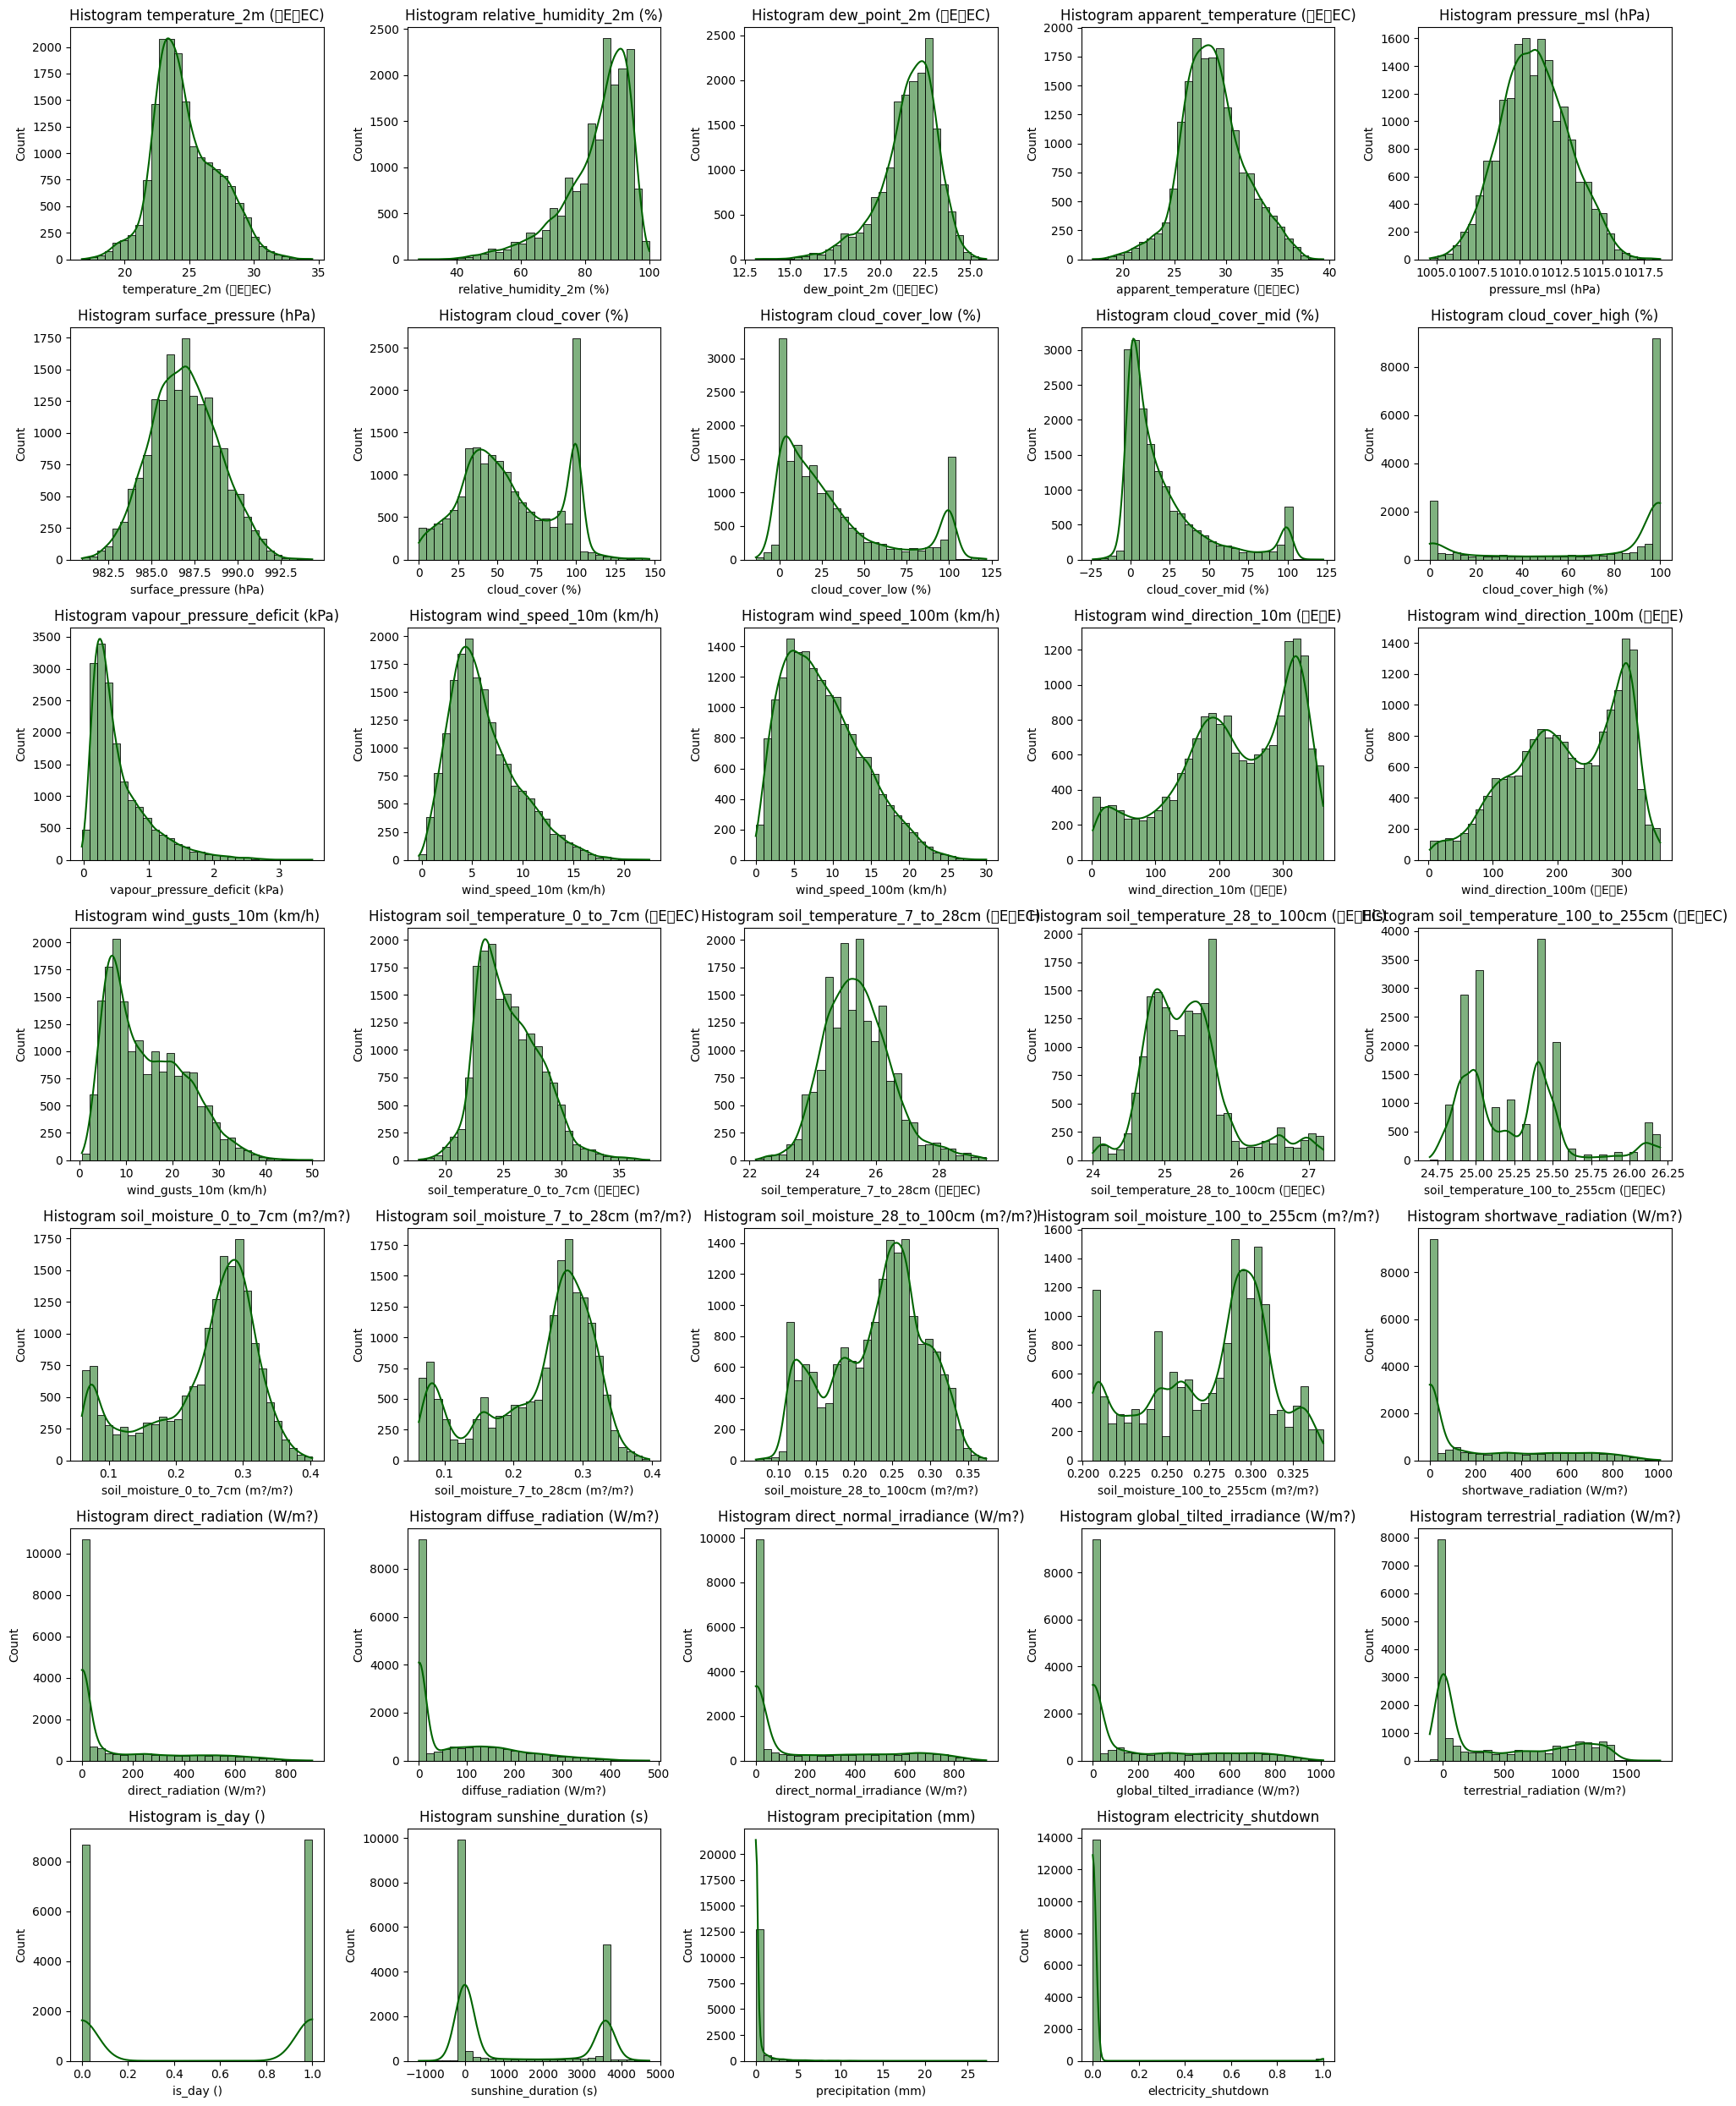

In [19]:
fig, ax = plt.subplots(7, 5, figsize=(20, 25))
ax = ax.flatten()

columns_to_plot = [col for col in train.columns if col not in ['ID', 'time']]

for i, column in enumerate(columns_to_plot):
    sns.histplot(x=column, data=train, color='darkgreen', ax=ax[i], kde=True, bins=30)
    ax[i].set_title(f'Histogram {column}')

for j in range(i + 1, 7 * 5):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Dari gambar tersebut kita dapat melihat bahwa beberapa kolom didominasi oleh data yang tidak berdistribusi normal

#### **3. Box Plot**

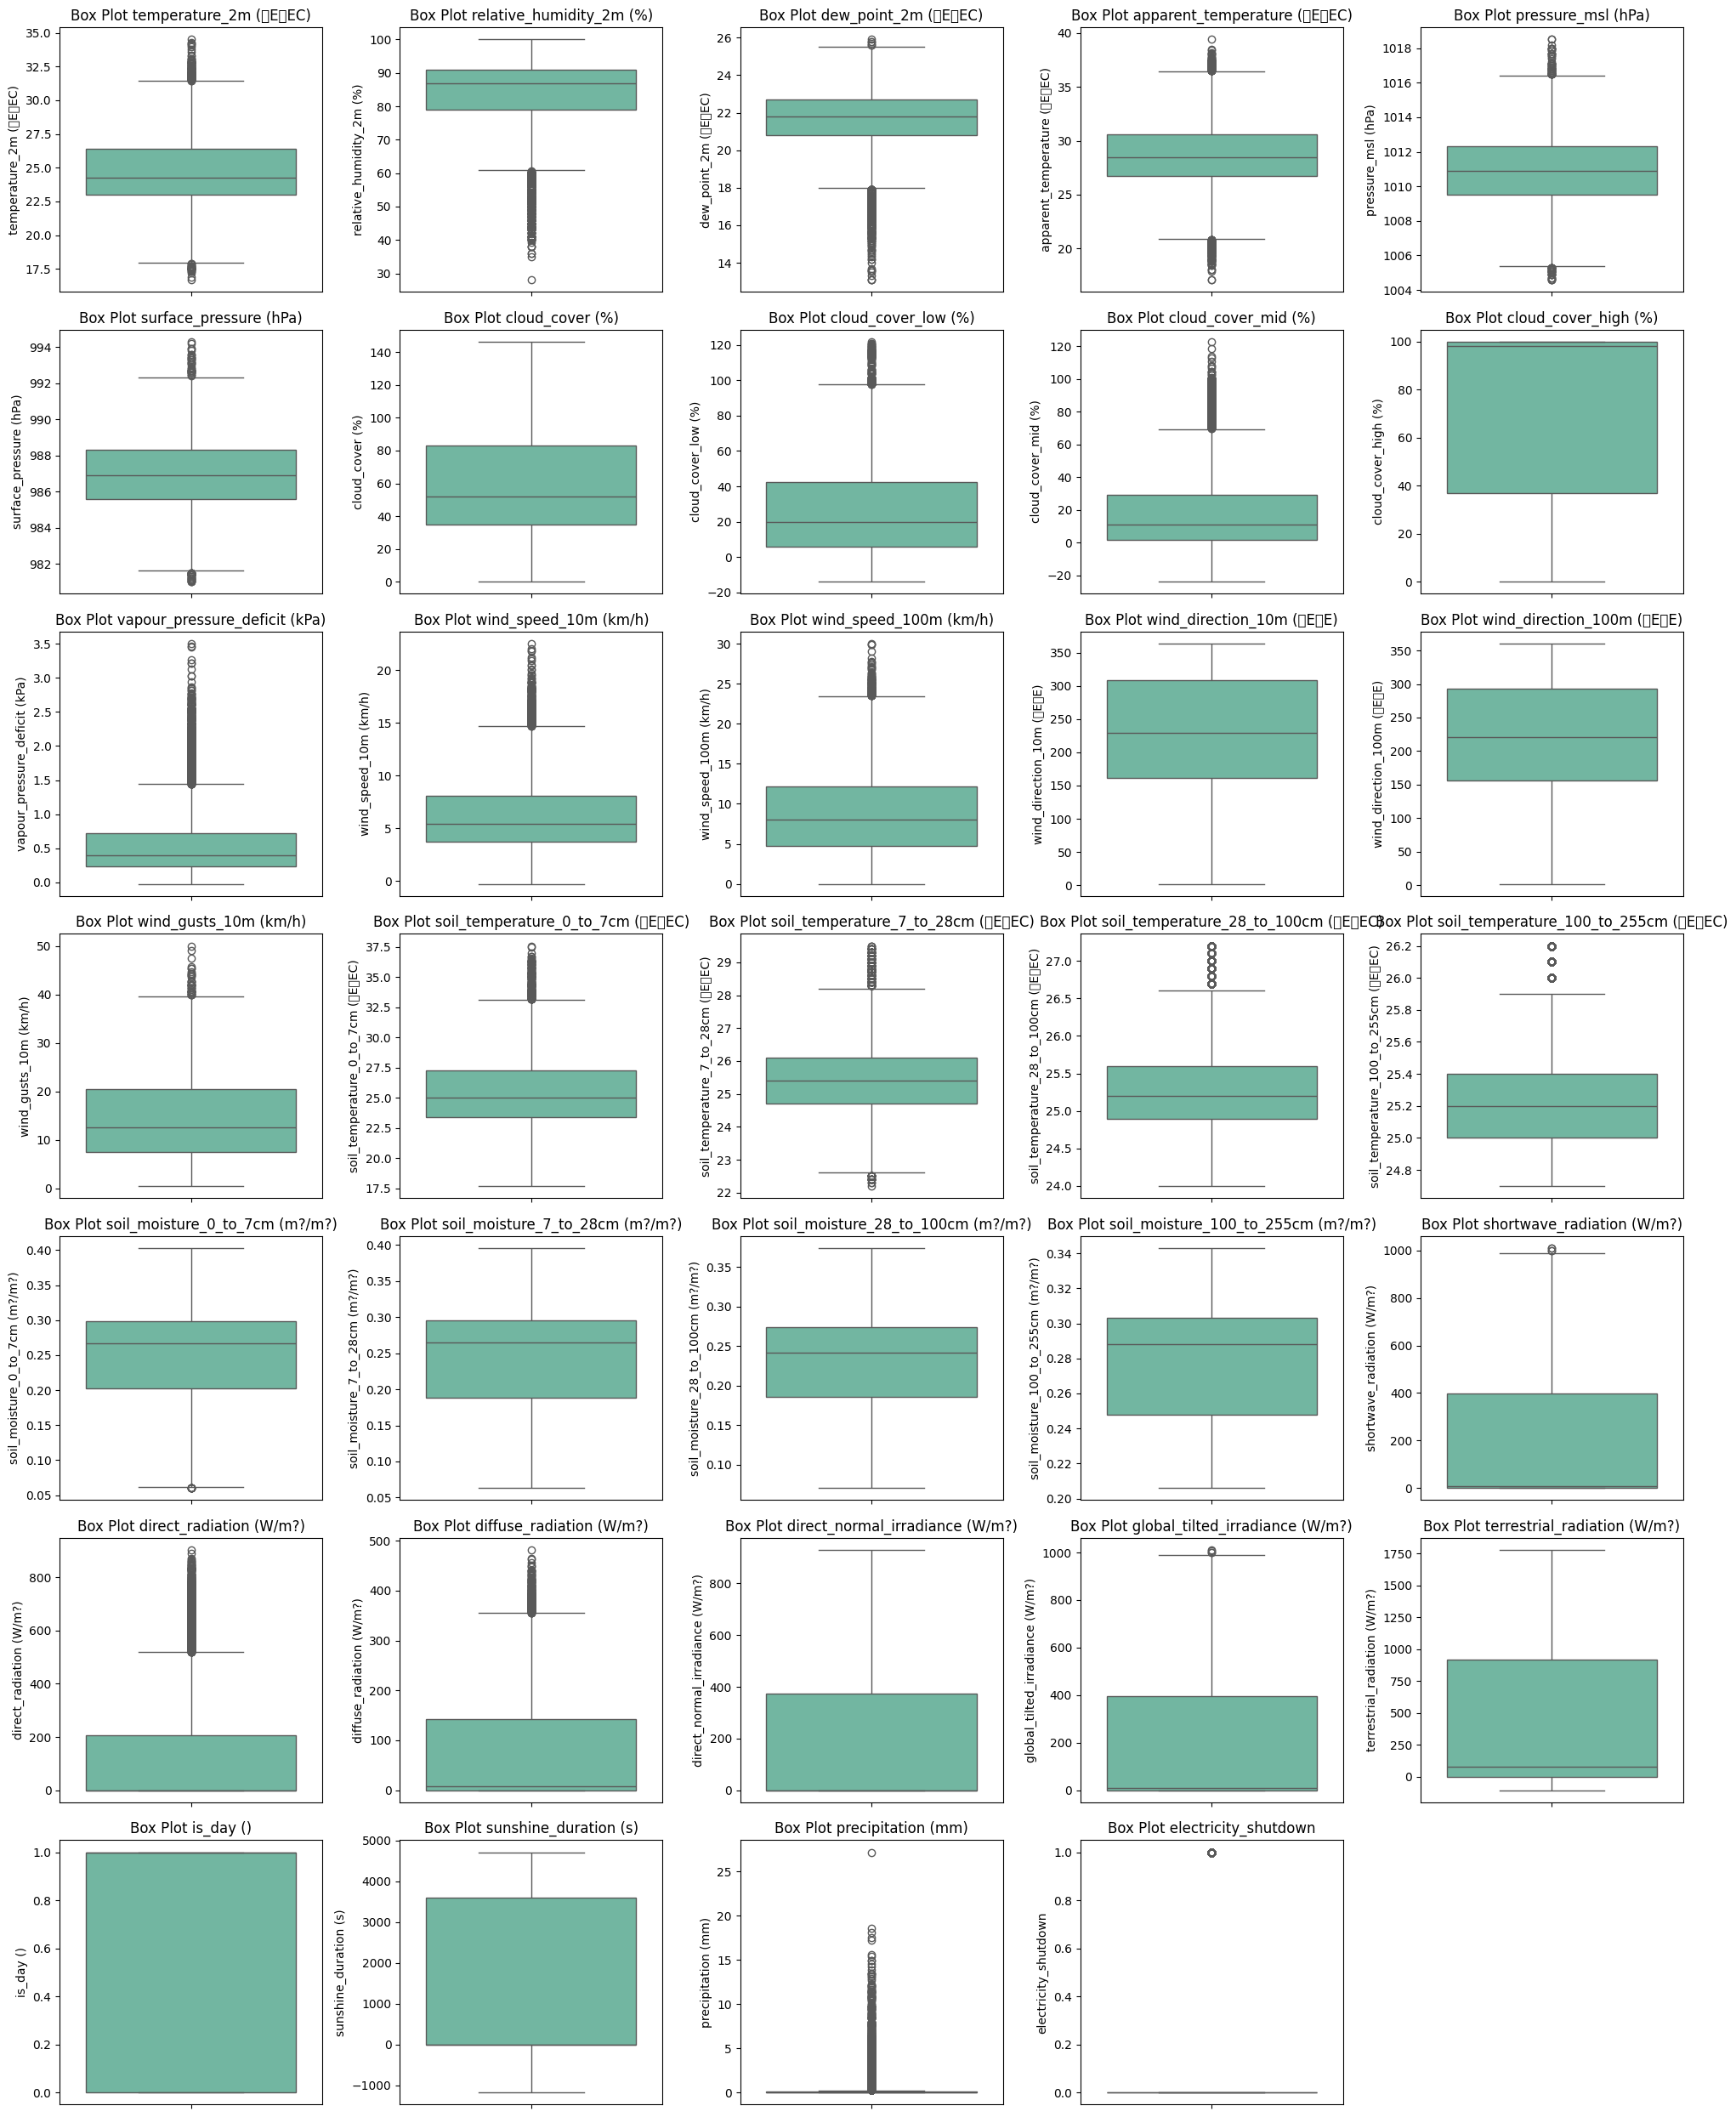

In [20]:
fig, ax = plt.subplots(7, 5, figsize=(20, 25))
ax = ax.flatten()

columns_to_plot = [col for col in train.columns if col not in ['ID', 'time']]

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=column, data=train, palette='Set2', ax=ax[i])
    ax[i].set_title(f'Box Plot {column}')

for j in range(i + 1, 7 * 5):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Terdapat beberapa kolom yang memiliki `Outliers` , namun pada bagian ini kami tidak memutuskan untuk menghapus `Outlier` tersebut. 

#### **`Test`**

##### **1. Statistic Descriptive**

In [21]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4368.0,19704.500000,1261.077317,17521.000000,18612.750000,19704.500000,20796.250,21888.000000
temperature_2m (EEC),4368.0,25.430693,2.185804,19.000000,23.800000,24.963924,27.000,31.656511
relative_humidity_2m (%),4368.0,85.376722,8.207480,48.451873,81.000000,87.000000,92.000,99.000000
dew_point_2m (EEC),4368.0,22.706296,1.289108,17.500000,22.000000,22.800000,23.600,26.500000
apparent_temperature (EEC),4368.0,30.140911,2.901916,21.600000,28.100000,29.900000,32.000,38.600000
pressure_msl (hPa),4368.0,1010.973054,1.730290,1005.600000,1009.800000,1011.000000,1012.200,1015.300000
surface_pressure (hPa),4368.0,987.026355,1.648317,982.100000,985.900000,987.000000,988.200,991.300000
cloud_cover (%),4368.0,53.340544,27.556754,0.000000,34.000000,49.000000,72.000,143.073247
cloud_cover_low (%),4368.0,25.178691,27.470521,-13.239094,6.000000,17.000000,32.000,120.060628
cloud_cover_mid (%),4368.0,21.291784,26.007047,-15.872446,3.000000,12.000000,28.000,110.170519


#### **2. Plot Distribusi**

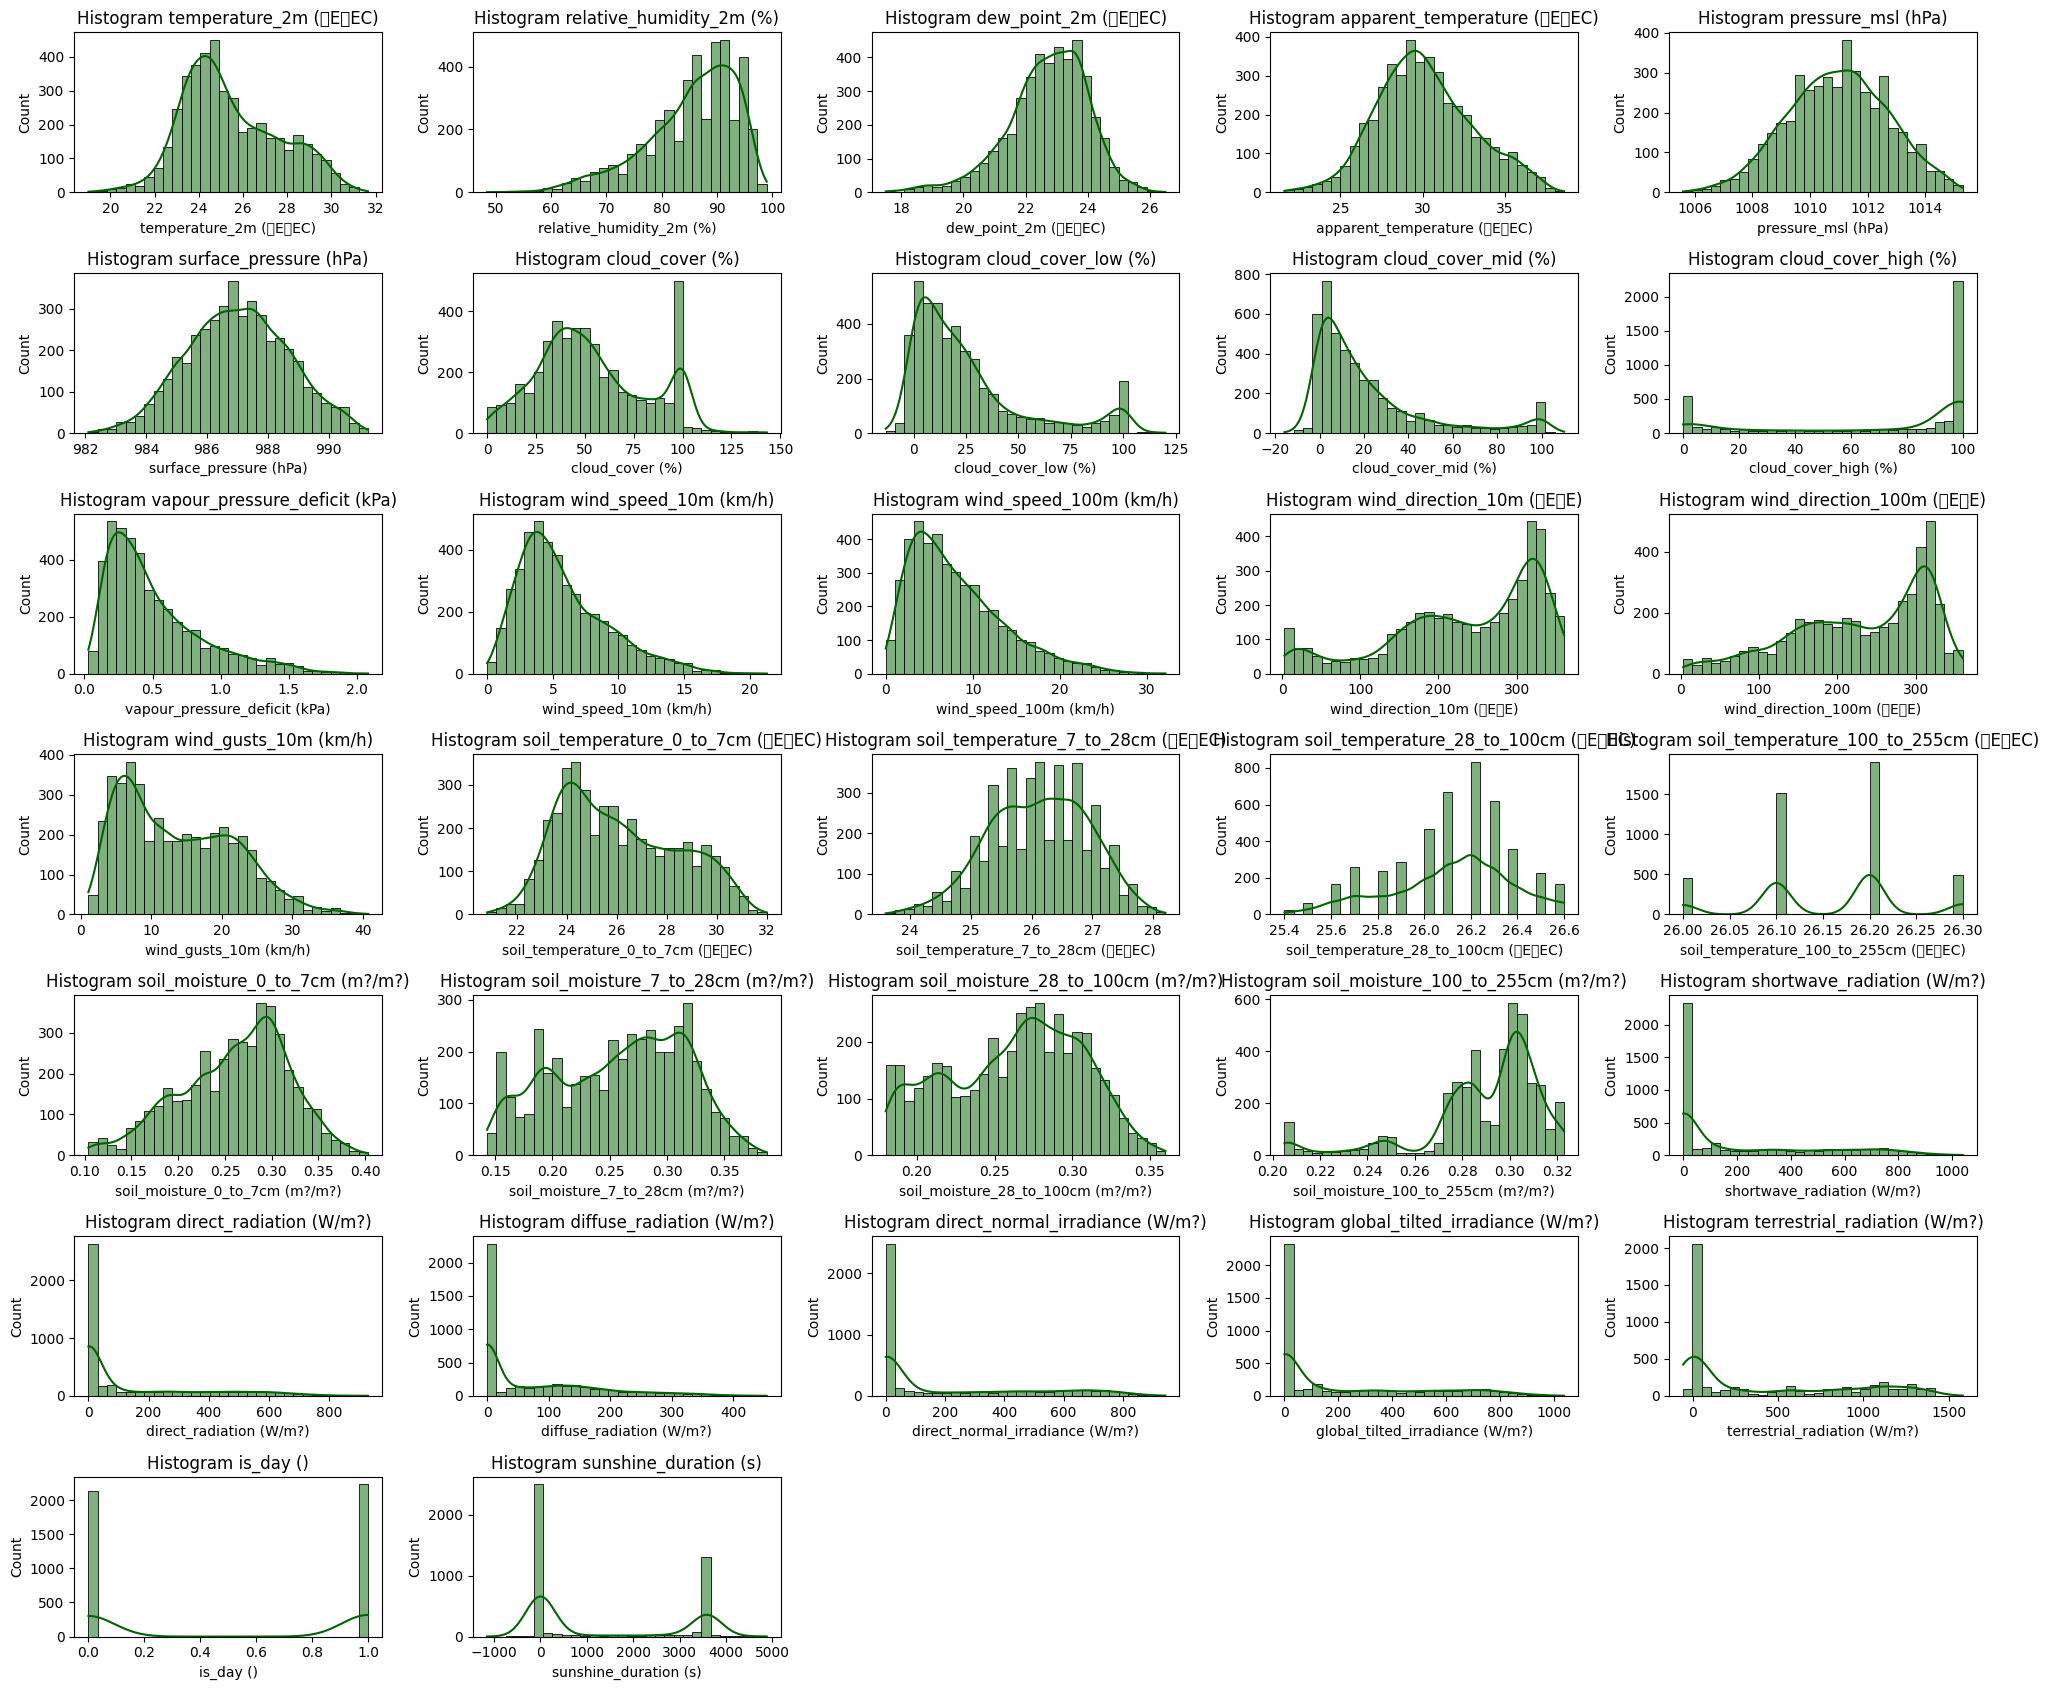

In [22]:
fig, ax = plt.subplots(7, 5, figsize=(20, 17))
ax = ax.flatten()

columns_to_plot = [col for col in test.columns if col not in ['ID', 'time']]

for i, column in enumerate(columns_to_plot):
    sns.histplot(x=column, data=test, color='darkgreen', ax=ax[i], kde=True, bins=30)
    ax[i].set_title(f'Histogram {column}')

for j in range(i + 1, 7 * 5):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

#### **3. Box Plot**

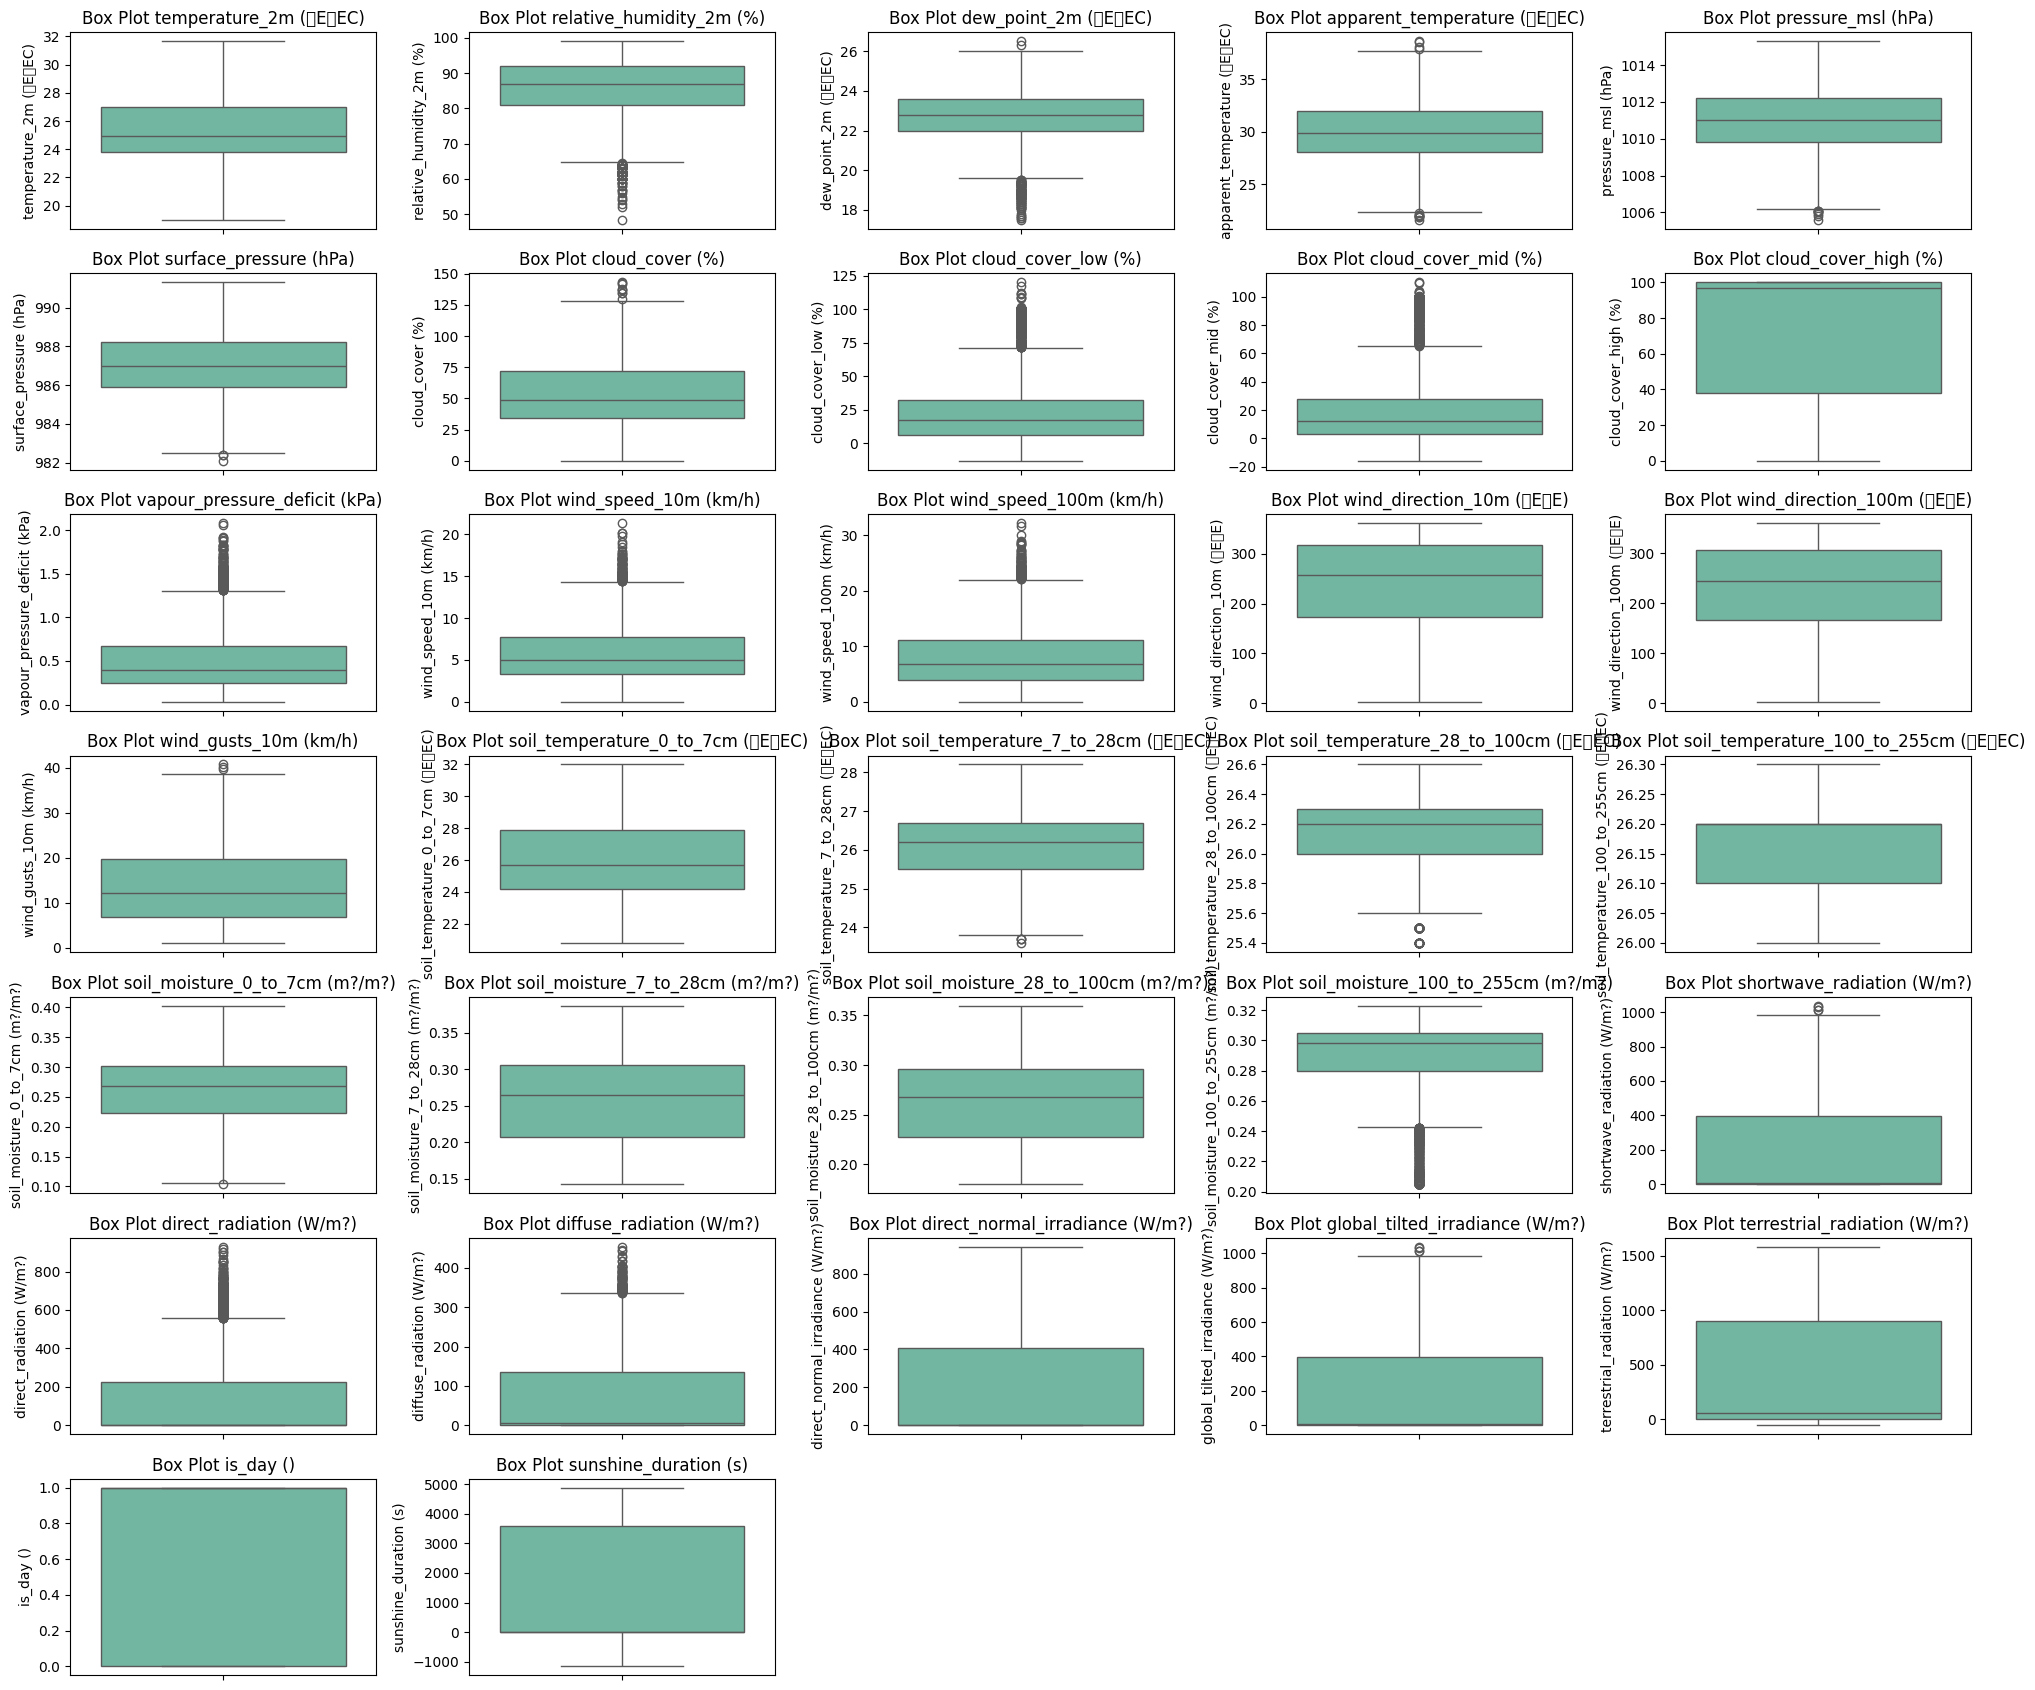

In [23]:
fig, ax = plt.subplots(7, 5, figsize=(20, 17))
ax = ax.flatten()

columns_to_plot = [col for col in test.columns if col not in ['ID', 'time']]

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=column, data=test, palette='Set2', ax=ax[i])
    ax[i].set_title(f'Box Plot {column}')

for j in range(i + 1, 7 * 5):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

--------------------------------------------------

## **Feature Engineering**

In [24]:
data = pd.concat([train.drop(columns=['precipitation (mm)', 'electricity_shutdown']), test], axis=0)

### **1. TimeStamp Extraction**

Penjelasan:
- **`hour`**        : Menyimpan informasi tentang jam dari waktu yang tercatat. Ini berguna untuk menganalisis aktivitas yang mungkin berbeda di berbagai jam sepanjang hari.
- **`day_of_week`** : Menyimpan informasi tentang hari dalam minggu (0 untuk Senin, 6 untuk Minggu). Ini berguna untuk melihat pola berdasarkan hari dalam seminggu.
- **`month`**       : Menyimpan informasi tentang bulan dari waktu yang tercatat. Ini membantu dalam analisis musiman dan tren bulanan.
- **`year`**        : Menyimpan informasi tentang tahun dari waktu yang tercatat. Ini penting untuk analisis tren jangka panjang dan perubahan tahunan.
- **`day`**         : Menyimpan informasi tentang hari dalam bulan. Ini berguna untuk analisis yang lebih terperinci tentang aktivitas harian.

In [25]:
data['hour'] = pd.to_datetime(data['time']).dt.hour
data['day_of_week'] = pd.to_datetime(data['time']).dt.dayofweek
data['month'] = pd.to_datetime(data['time']).dt.month
data['year'] = pd.to_datetime(data['time']).dt.year
data['day'] = pd.to_datetime(data['time']).dt.day

### **2. TimeStamp Interaction**

Penjelasan:
- **`interaction_day_month`**: Menggabungkan hari dan bulan menjadi string yang dapat digunakan untuk analisis interaksi antara hari dan bulan. Fitur ini memungkinkan Anda untuk mengidentifikasi pola musiman yang mungkin terjadi pada hari-hari tertentu dalam bulan-bulan tertentu.


- **`interaction_day_hour`**: Menggabungkan hari dan jam menjadi string yang menunjukkan interaksi antara waktu hari dan jam. Fitur ini berguna untuk menganalisis pola waktu yang lebih detail.

- **`interaction_month_hour`**: Menggabungkan bulan dan jam menjadi string yang menunjukkan interaksi antara bulan dan jam. Ini membantu dalam analisis pola bulanan pada waktu-waktu tertentu dalam hari.

**`LabelEncoder`**: Mengubah fitur interaksi menjadi angka untuk keperluan pemodelan machine learning. Ini mengubah string menjadi label numerik yang dapat diproses oleh algoritma machine learning.



In [26]:
data['interaction_day_month'] = data['day'].astype(str) + '+' + data['month'].astype(str)
data['interaction_day_hour'] = data['day'].astype(str) + '+' + data['hour'].astype(str)
data['interaction_month_hour'] = data['month'].astype(str) + '+' + data['hour'].astype(str)

label_encoders = {}
for feature in ['interaction_day_hour', 'interaction_month_hour', 'interaction_day_month']:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

### **3. Soil Moisture and Temperature Interaction**

Penjelasan:

- **`interaction_soil_moisture_temp_1`**: Menggabungkan kelembapan tanah dari kedalaman 7-28 cm dengan suhu tanah pada kedalaman yang sama. Ini memberikan interaksi antara kelembapan dan suhu pada kedalaman yang sama.

- **`interaction_soil_moisture_temp_2`**: Menggabungkan kelembapan tanah dari kedalaman 7-28 cm dengan suhu tanah pada kedalaman 28-100 cm. Ini membantu menganalisis hubungan antara kelembapan tanah pada kedalaman yang lebih dangkal dengan suhu tanah pada kedalaman yang lebih dalam.

- **`interaction_soil_moisture_temp_3`**: Menggabungkan kelembapan tanah dari kedalaman 7-28 cm dengan suhu tanah pada kedalaman 100-255 cm. Ini memungkinkan analisis interaksi antara kelembapan tanah dangkal dan suhu tanah yang sangat dalam.

- **`total_soil_moisture`**: Menghitung total kelembapan tanah dari semua kedalaman yang ada. Ini memberikan gambaran keseluruhan kelembapan tanah.

- **`total_soil_temperature`**: Menghitung total suhu tanah dari semua kedalaman yang ada. Ini memberikan gambaran keseluruhan suhu tanah.

- **`interact_total_moistemp`**: Menghitung interaksi antara total kelembapan tanah dan total suhu tanah. Ini memberikan fitur yang menggabungkan informasi tentang kelembapan dan suhu secara keseluruhan.

In [27]:
data['interaction_soil_moisture_temp_1'] = (
    data['soil_moisture_7_to_28cm (m?/m?)'] + 
    data['soil_temperature_7_to_28cm (EEC)']
)

data['interaction_soil_moisture_temp_2'] = (
    data['soil_moisture_7_to_28cm (m?/m?)'] + 
    data['soil_temperature_28_to_100cm (EEC)']
)

data['interaction_soil_moisture_temp_3'] = (
    data['soil_moisture_7_to_28cm (m?/m?)'] + 
    data['soil_temperature_100_to_255cm (EEC)']
)

data['total_soil_moisture'] = (
    data['soil_moisture_7_to_28cm (m?/m?)'] + 
    data['soil_moisture_28_to_100cm (m?/m?)'] + 
    data['soil_moisture_100_to_255cm (m?/m?)']
)

data['total_soil_temperature'] = (
    data['soil_temperature_7_to_28cm (EEC)'] + 
    data['soil_temperature_28_to_100cm (EEC)'] + 
    data['soil_temperature_100_to_255cm (EEC)']
)

data['interact_total_moistemp'] = (
    data['total_soil_moisture'] * 
    data['total_soil_temperature']
)


### **4. Soil Moisture based on Interaction of Day and Month**

Penjelasan:
- **`avg_soil_moisture1_intmon`**: Menghitung rata-rata kelembapan tanah pada kedalaman 7-28 cm untuk setiap kombinasi hari dan bulan (interaction_day_month). Ini memberikan gambaran umum tentang bagaimana kelembapan tanah pada kedalaman tersebut bervariasi berdasarkan waktu (hari dan bulan).

- **`avg_soil_moisture2_intmon`**: Menghitung rata-rata kelembapan tanah pada kedalaman 28-100 cm untuk setiap kombinasi hari dan bulan. Ini menunjukkan variasi kelembapan tanah pada kedalaman yang lebih dalam berdasarkan waktu.

- **`avg_soil_moisture3_intmon`**: Menghitung rata-rata kelembapan tanah pada kedalaman 100-255 cm untuk setiap kombinasi hari dan bulan. Ini memberikan informasi tentang kelembapan tanah pada kedalaman yang sangat dalam dan bagaimana variasinya tergantung pada waktu.

In [28]:
data['avg_soil_moisture1_intmon'] = (
    data.groupby('interaction_day_month')['soil_moisture_7_to_28cm (m?/m?)']
    .transform('mean')
)

data['avg_soil_moisture2_intmon'] = (
    data.groupby('interaction_day_month')['soil_moisture_28_to_100cm (m?/m?)']
    .transform('mean')
)

data['avg_soil_moisture3_intmon'] = (
    data.groupby('interaction_day_month')['soil_moisture_100_to_255cm (m?/m?)']
    .transform('mean')
)


### **5. Soil Temperature based on Interaction of Day and Month**

Penjelasan:
- **`avg_soil_temp1_intmon`**: Menghitung rata-rata suhu tanah pada kedalaman 7-28 cm untuk setiap kombinasi hari dan bulan (interaction_day_month). Ini memberikan gambaran tentang variasi suhu tanah pada kedalaman tersebut berdasarkan waktu.

- **`avg_soil_temp2_intmon`:** Menghitung rata-rata suhu tanah pada kedalaman 28-100 cm untuk setiap kombinasi hari dan bulan. Ini menunjukkan bagaimana suhu tanah pada kedalaman tersebut bervariasi berdasarkan waktu.

- **`avg_soil_temp3_intmon`:** Menghitung rata-rata suhu tanah pada kedalaman 100-255 cm untuk setiap kombinasi hari dan bulan. Ini memberikan informasi tentang suhu tanah pada kedalaman yang sangat dalam dan variasinya tergantung pada waktu.

In [29]:
data['avg_soil_temp1_intmon'] = (
    data.groupby('interaction_day_month')['soil_temperature_7_to_28cm (EEC)']
    .transform('mean')
)

data['avg_soil_temp2_intmon'] = (
    data.groupby('interaction_day_month')['soil_temperature_28_to_100cm (EEC)']
    .transform('mean')
)

data['avg_soil_temp3_intmon'] = (
    data.groupby('interaction_day_month')['soil_temperature_100_to_255cm (EEC)']
    .transform('mean')
)

### **6. Soil Moisture based on Interaction of Day and Hour**

Penjelasan:
- **`avg_soil_moisture1_intday`**: Menghitung rata-rata kelembapan tanah pada kedalaman 7-28 cm berdasarkan interaksi hari dan jam (interaction_day_hour). Ini memberikan informasi tentang variasi kelembapan tanah pada kedalaman tersebut pada tingkat jam.

- **`avg_soil_moisture2_intday`**: Menghitung rata-rata kelembapan tanah pada kedalaman 28-100 cm berdasarkan interaksi hari dan jam. Ini memperlihatkan variasi kelembapan pada kedalaman yang lebih dalam secara jam per jam.

- **`avg_soil_moisture3_intday`**: Menghitung rata-rata kelembapan tanah pada kedalaman 100-255 cm berdasarkan interaksi hari dan jam. Memberikan gambaran mengenai kelembapan tanah pada kedalaman yang sangat dalam dengan resolusi waktu harian dan jam.



In [30]:
data['avg_soil_moisture1_intday'] = (
    data.groupby('interaction_day_hour')['soil_moisture_7_to_28cm (m?/m?)']
    .transform('mean')
)

data['avg_soil_moisture2_intday'] = (
    data.groupby('interaction_day_hour')['soil_moisture_28_to_100cm (m?/m?)']
    .transform('mean')
)

data['avg_soil_moisture3_intday'] = (
    data.groupby('interaction_day_hour')['soil_moisture_100_to_255cm (m?/m?)']
    .transform('mean')
)


### **6. Soil Temperature based on Interaction of Day and Hour**

Penjelasan:
- **`avg_soil_temp1_intday`**: Menghitung rata-rata suhu tanah pada kedalaman 7-28 cm berdasarkan interaksi antara hari dan jam (interaction_day_hour). Ini memberikan wawasan tentang variasi suhu tanah pada kedalaman ini secara waktu harian dan jam.

- **`avg_soil_temp2_intday`**: Menghitung rata-rata suhu tanah pada kedalaman 28-100 cm berdasarkan interaksi hari dan jam. Ini menunjukkan variasi suhu tanah pada kedalaman yang lebih dalam setiap jam.

- **`avg_soil_temp3_intday`**: Menghitung rata-rata suhu tanah pada kedalaman 100-255 cm berdasarkan interaksi hari dan jam. Memberikan gambaran tentang bagaimana suhu tanah pada kedalaman ini bervariasi dari waktu ke waktu pada tingkat jam.

In [31]:
data['avg_soil_temp1_intday'] = ( 
    data.groupby('interaction_day_hour')['soil_temperature_7_to_28cm (EEC)']
    .transform('mean')
)

data['avg_soil_temp2_intday'] = (
    data.groupby('interaction_day_hour')['soil_temperature_28_to_100cm (EEC)']
    .transform('mean')
)

data['avg_soil_temp3_intday'] = ( 
    data.groupby('interaction_day_hour')['soil_temperature_100_to_255cm (EEC)']
    .transform('mean')
)


### **7. Cloud Cover based on Interaction day and hour**

Penjelasan:

- **`avg_cloud_cover_mid_intday`**: Menghitung rata-rata tutupan awan pada ketinggian menengah (mid) berdasarkan interaksi hari dan jam. Ini memberikan wawasan tentang variasi tutupan awan di ketinggian menengah pada tiap jam dalam sehari.

- **`avg_cloud_cover_high_intday`**: Menghitung rata-rata tutupan awan pada ketinggian tinggi (high) berdasarkan interaksi hari dan jam. Berguna untuk mengetahui pola tutupan awan pada ketinggian tinggi.

- **`avg_cloud_cover_low_intday`**: Menghitung rata-rata tutupan awan pada ketinggian rendah (low) berdasarkan interaksi hari dan jam, membantu dalam analisis variasi tutupan awan dekat permukaan.

- **`avg_cloud_cover_general_intday`**: Menghitung rata-rata tutupan awan secara umum berdasarkan interaksi hari dan jam, memberikan gambaran keseluruhan tentang kondisi awan pada tiap jam dalam sehari.

In [32]:
data['avg_cloud_cover_mid_intday'] = (
    data.groupby('interaction_day_hour')['cloud_cover_mid (%)'
    ].transform('mean')
)

data['avg_cloud_cover_high_intday'] = (
    data.groupby('interaction_day_hour')['cloud_cover_high (%)']
    .transform('mean')
)

data['avg_cloud_cover_low_intday'] = (
    data.groupby('interaction_day_hour')['cloud_cover_low (%)']
    .transform('mean')
)

data['avg_cloud_cover_general_intday'] = (
    data.groupby('interaction_day_hour')['cloud_cover (%)']
    .transform('mean')
)


### **8. Cloud Cover based on day**

Penjelasan:
- **`avg_cloud_cover_mid_day`**: Menghitung rata-rata tutupan awan pada ketinggian menengah (mid) untuk setiap hari. Ini membantu untuk melihat pola tutupan awan di ketinggian menengah sepanjang hari.

- **`avg_cloud_cover_high_day`**: Menghitung rata-rata tutupan awan pada ketinggian tinggi (high) untuk setiap hari. Wawasan ini bermanfaat untuk memahami kondisi atmosfer pada lapisan atas.

- **`avg_cloud_cover_low_day`**: Menghitung rata-rata tutupan awan pada ketinggian rendah (low) untuk setiap hari. Berguna untuk analisis kondisi awan dekat permukaan pada skala harian.

- **`avg_cloud_cover_general_day`**: Menghitung rata-rata tutupan awan secara umum untuk setiap hari, yang memberikan gambaran umum kondisi tutupan awan harian.

In [33]:
data['avg_cloud_cover_mid_day'] = (
    data.groupby('day')['cloud_cover_mid (%)']
    .transform('mean')
)

data['avg_cloud_cover_high_day'] = (
    data.groupby('day')['cloud_cover_high (%)']
    .transform('mean')
)

data['avg_cloud_cover_low_day'] = (
    data.groupby('day')['cloud_cover_low (%)']
    .transform('mean')
)

data['avg_cloud_cover_general_day'] = (
    data.groupby('day')['cloud_cover (%)']
    .transform('mean')
)

### **8. Cloud Cover based on hour**

Penjelasan:
- **`avg_cloud_cover_mid_hour`**: Menghitung rata-rata tutupan awan pada ketinggian menengah (mid) untuk setiap jam. Ini memberikan informasi tentang pola tutupan awan di ketinggian menengah sepanjang hari berdasarkan waktu per jam.

- **`avg_cloud_cover_high_hour`**: Menghitung rata-rata tutupan awan pada ketinggian tinggi (high) untuk setiap jam. Berguna untuk memantau variasi tutupan awan pada lapisan atas dalam interval waktu jam.

- **`avg_cloud_cover_low_hour`**: Menghitung rata-rata tutupan awan pada ketinggian rendah (low) untuk setiap jam. Memberikan gambaran tentang kondisi awan dekat permukaan pada skala waktu per jam.

- **`avg_cloud_cover_general_hour`** : Menghitung rata-rata tutupan awan secara umum untuk setiap jam. Memberikan gambaran umum tentang kondisi awan dekat permukaan pada skala waktu per jam.

In [34]:
data['avg_cloud_cover_mid_hour'] = (
    data.groupby('hour')['cloud_cover_mid (%)']
    .transform('mean')
)

data['avg_cloud_cover_high_hour'] = (
    data.groupby('hour')['cloud_cover_high (%)']
    .transform('mean')
)

data['avg_cloud_cover_low_hour'] = (
    data.groupby('hour')['cloud_cover_low (%)']
    .transform('mean')
)

data['avg_cloud_cover_general_hour'] = (
    data.groupby('hour')['cloud_cover (%)']
    .transform('mean')
)

### **9. Pressure based on interaction of day and month**

Penjelasan:
- **`avg_surface_pressure_intmon`**: Menghitung rata-rata tekanan permukaan (surface pressure) untuk setiap kombinasi hari-bulan. Ini memberikan wawasan tentang bagaimana tekanan permukaan bervariasi selama periode waktu tertentu.

- **`avg_pressure_msl_intmon`**: Menghitung rata-rata tekanan MSL (Mean Sea Level Pressure) untuk setiap kombinasi hari-bulan. Hal ini dapat membantu dalam analisis perubahan tekanan atmosfer pada tingkat permukaan laut selama rentang waktu tertentu.



In [35]:
data['avg_surface_pressure_intmon'] = (
    data.groupby('interaction_day_month')['surface_pressure (hPa)']
    .transform('mean')
)

data['avg_pressure_msl_intmon'] = (
    data.groupby('interaction_day_month')['pressure_msl (hPa)']
    .transform('mean')
)

### **10. Another Feature Extraction**

In [36]:
data['vpd_temperature_ratio'] = data['vapour_pressure_deficit (kPa)'] / (data['temperature_2m (EEC)'] + 1)
data['pressure_change'] = data['pressure_msl (hPa)'] - data['surface_pressure (hPa)']

data['humidity_dewpoint_ratio'] = data['relative_humidity_2m (%)'] / (data['dew_point_2m (EEC)'] + 1)
data['combined_radiation'] = data['shortwave_radiation (W/m?)'] + data['direct_radiation (W/m?)']

data['wind_speed_ratio'] = data['wind_speed_100m (km/h)'] / (data['wind_speed_10m (km/h)'] + 1)
data['wind_speed_direction_10m'] = data['wind_speed_10m (km/h)'] * data['wind_direction_10m (EE)']
data['wind_speed_direction_100m'] = data['wind_speed_100m (km/h)'] * data['wind_direction_100m (EE)']

data['daily_avg_temperature'] = data.groupby(['year', 'month', 'day'])['temperature_2m (EEC)'].transform('mean')
data['daily_max_wind_speed'] = data.groupby(['year', 'month', 'day'])['wind_speed_10m (km/h)'].transform('max')

data['daily_temp_hmn'] = data.groupby(['year', 'month', 'day'])['apparent_temperature (EEC)'].transform('mean')
data['daily_cloud_cover_max'] = data.groupby(['year', 'month', 'day'])['cloud_cover (%)'].transform('max')

data['daily_soil_moisture_7_to_28cm'] = data.groupby(['year', 'month', 'day'])['soil_moisture_7_to_28cm (m?/m?)'].transform('var')
data['daily_soil_moisture_28_to_100cm'] = data.groupby(['year', 'month', 'day'])['soil_moisture_28_to_100cm (m?/m?)'].transform('var')
data['daily_soil_moisture_100_to_255cm'] = data.groupby(['year', 'month', 'day'])['soil_moisture_100_to_255cm (m?/m?)'].transform('var')

data['daily_soil_temp_7_to_28cm'] = data.groupby(['year', 'month', 'day'])['soil_temperature_7_to_28cm (EEC)'].transform('var')
data['daily_soil_temp_28_to_100cm'] = data.groupby(['year', 'month', 'day'])['soil_temperature_28_to_100cm (EEC)'].transform('var')
data['daily_soil_temp_100_to_255cm'] = data.groupby(['year', 'month', 'day'])['soil_temperature_100_to_255cm (EEC)'].transform('var')

data['daily_cloud_cover_max_var'] = data.groupby(['year', 'month', 'day'])['cloud_cover (%)'].transform('var')
data['daily_cloud_cover_mid_var'] = data.groupby(['year', 'month', 'day'])['cloud_cover_mid (%)'].transform('var')
data['daily_cloud_cover_high_var'] = data.groupby(['year', 'month', 'day'])['cloud_cover_high (%)'].transform('var')
data['daily_cloud_cover_low_var'] = data.groupby(['year', 'month', 'day'])['cloud_cover_low (%)'].transform('var')

data['daily_temperature_2m (EEC Var'] = data.groupby(['year', 'month', 'day'])['temperature_2m (EEC)'].transform('var')
data['daily_apparent_temperature (EEC) Var']  = data.groupby(['year', 'month', 'day'])['apparent_temperature (EEC)'].transform('var')

data['daily_shortwave_radiation (W/m?) Mean'] = data.groupby(['year', 'month', 'day'])['shortwave_radiation (W/m?)'].transform('mean')
data['daily_direct_radiation (W/m?) Mean'] = data.groupby(['year', 'month', 'day'])['direct_radiation (W/m?)'].transform('mean')
data['daily_diffuse_radiation (W/m?) Mean'] = data.groupby(['year', 'month', 'day'])['diffuse_radiation (W/m?)'].transform('mean')
data['daily_terestrial_radiation (W/m?) Mean'] = data.groupby(['year', 'month', 'day'])['terrestrial_radiation (W/m?)'].transform('mean')
data['daily_global_tilted_irradiance (W/m?) Mean'] = data.groupby(['year', 'month', 'day'])['global_tilted_irradiance (W/m?)'].transform('mean')

data['daily_shortwave_radiation (W/m?) Var'] = data.groupby(['year', 'month', 'day'])['shortwave_radiation (W/m?)'].transform('var')
data['daily_direct_radiation (W/m?) Var'] = data.groupby(['year', 'month', 'day'])['direct_radiation (W/m?)'].transform('var')
data['daily_diffuse_radiation (W/m?) Var'] = data.groupby(['year', 'month', 'day'])['diffuse_radiation (W/m?)'].transform('var')
data['daily_terestrial_radiation (W/m?) Var'] = data.groupby(['year', 'month', 'day'])['terrestrial_radiation (W/m?)'].transform('var')
data['daily_global_tilted_irradiance (W/m?) Var'] = data.groupby(['year', 'month', 'day'])['global_tilted_irradiance (W/m?)'].transform('var')

data['daily_wind_gust'] = data.groupby(['year', 'month', 'day'])['wind_gusts_10m (km/h)'].transform('mean')
data['daily_std_wind_gust'] = data.groupby(['year', 'month', 'day'])['wind_gusts_10m (km/h)'].transform('std')

data['wind_gust_hour'] = data.groupby('hour')['wind_gusts_10m (km/h)'].mean()

data['wind_chill'] = 13.12 + 0.6215 * data['temperature_2m (EEC)'] - 11.37 * (data['wind_speed_10m (km/h)'] ** 0.16) + 0.3965 * data['temperature_2m (EEC)'] * (data['wind_speed_10m (km/h)'] ** 0.16)
data['heat_index'] = -8.78469475556 + 1.61139411 * data['temperature_2m (EEC)'] + 2.33854883889 * data['relative_humidity_2m (%)'] - 0.14611605 * data['temperature_2m (EEC)'] * data['relative_humidity_2m (%)']

In [37]:
data.columns

Index(['ID', 'time', 'temperature_2m (EEC)', 'relative_humidity_2m (%)',
       'dew_point_2m (EEC)', 'apparent_temperature (EEC)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)',
       ...
       'daily_shortwave_radiation (W/m?) Var',
       'daily_direct_radiation (W/m?) Var',
       'daily_diffuse_radiation (W/m?) Var',
       'daily_terestrial_radiation (W/m?) Var',
       'daily_global_tilted_irradiance (W/m?) Var', 'daily_wind_gust',
       'daily_std_wind_gust', 'wind_gust_hour', 'wind_chill', 'heat_index'],
      dtype='object', length=112)

### **10. Time Series Feature Extraction**

In [38]:
exclude_columns = ['ID', 'time', 'precipitation (mm)', 'electricity_shutdown', 'is_day ()']

for col in data.columns:
    if col not in exclude_columns:

        for i in range(3):
            data[f'{col}_change_{i}'] = data[col] - data[col].shift(i)
            data[f'{col}_change_{-i}'] = data[col] - data[col].shift(-i)

            data[f'rolling_mean_{col}_change_{i}'] = data[f'{col}_change_{i}'].rolling(window=2).mean()
            data[f'rolling_mean_{col}_change_{-i}'] = data[f'{col}_change_{-i}'].rolling(window=2).mean()

            data[f'rolling_median_{col}_change_{i}'] = data[f'{col}_change_{i}'].rolling(window=2).median()
            data[f'rolling_median_{col}_change_{-i}'] = data[f'{col}_change_{-i}'].rolling(window=2).median()

            data[f'rolling_var_{col}_change_{i}'] = data[f'{col}_change_{i}'].rolling(window=2).var()
            data[f'rolling_var_{col}_change_{-i}'] = data[f'{col}_change_{-i}'].rolling(window=2).var()

            data[f'ewm_mean_{col}_change_{i}'] = data[f'{col}_change_{i}'].ewm(span=2).mean()
            data[f'ewm_mean_{col}_change_{-i}'] = data[f'{col}_change_{-i}'].ewm(span=2).mean()

            data[f'ewm_var_{col}_change_{i}'] = data[f'{col}_change_{i}'].ewm(span=2).var()
            data[f'ewm_var_{col}_change_{-i}'] = data[f'{col}_change_{-i}'].ewm(span=2).var()

            data[f'expsmooth_{col}_change_{i}'] = data[f'{col}_change_{i}'].ewm(alpha=0.3).mean()
            data[f'expsmooth_{col}_change_{-i}'] = data[f'{col}_change_{-i}'].ewm(alpha=0.3).mean()

            data[f'expsmooth_var_{col}_change_{i}'] = data[f'{col}_change_{i}'].ewm(alpha=0.3).var()
            data[f'expsmooth_var_{col}_change_{-i}'] = data[f'{col}_change_{-i}'].ewm(alpha=0.3).var()

            data[f'expanding_mean_{col}_change_{i}'] = data[f'{col}_change_{i}'].expanding(min_periods=1).mean()
            data[f'expanding_mean_{col}_change_{-i}'] = data[f'{col}_change_{-i}'].expanding(min_periods=1).mean()

            data[f'expanding_var_{col}_change_{i}'] = data[f'{col}_change_{i}'].expanding(min_periods=1).var()
            data[f'expanding_var_{col}_change_{-i}'] = data[f'{col}_change_{-i}'].expanding(min_periods=1).var()

            coeffs = pywt.wavedec(data[col].astype(float), 'db1', level=i)
            
            for idx, coeff in enumerate(coeffs):
                coeff_padded = np.pad(coeff, (0, len(data) - len(coeff)), 'constant', constant_values=np.nan)
                data[f'{col}_wavelet_coef_{idx}'] = coeff_padded
        
            reconstructed_signal = pywt.waverec(coeffs, 'db1')
            
            if len(reconstructed_signal) > len(data[col]):
                reconstructed_signal = reconstructed_signal[:len(data[col])]

            data[f'{col}_wavelet_reconstructed'] = reconstructed_signal

            data[f'{col}_lag_{i}'] = data[col].shift(i)
            data[f'{col}_lag_{-i}'] = data[col].shift(-i)

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

## **Modelling**

#### **1. Return Back the feature into the original Data Frame**

In [39]:
train = pd.concat([data[data['ID'].isin(train['ID'])], train[['precipitation (mm)', 'electricity_shutdown']]], axis=1)
test = data[data['ID'].isin(test['ID'])]
test = test.reset_index(drop=True)

In [40]:
train = train.dropna()
train['electricity_shutdown'] = train['electricity_shutdown'].astype(int)
train.drop(columns=['ID', 'time'], inplace=True)

#### **2. Choose best model for feature selection**

In [41]:

X = train.drop(columns=['electricity_shutdown', 'precipitation (mm)'], axis=1)
y1 = train['electricity_shutdown']
y2 = train['precipitation (mm)']

scaler1 = StandardScaler()
X = scaler1.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.17, random_state=42, stratify=y1)
X_train, y_train = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)


model1 = CatBoostClassifier(random_state=42, verbose=100)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)


print(f1_score(y_test, y_pred))

Learning rate set to 0.035695
0:	learn: 0.6505515	total: 942ms	remaining: 15m 41s
100:	learn: 0.0285122	total: 55.1s	remaining: 8m 10s
200:	learn: 0.0083467	total: 1m 38s	remaining: 6m 30s
300:	learn: 0.0046446	total: 2m 20s	remaining: 5m 25s
400:	learn: 0.0032021	total: 2m 58s	remaining: 4m 27s
500:	learn: 0.0030317	total: 3m 36s	remaining: 3m 36s
600:	learn: 0.0028708	total: 4m 19s	remaining: 2m 52s
700:	learn: 0.0027755	total: 5m 3s	remaining: 2m 9s
800:	learn: 0.0027400	total: 5m 48s	remaining: 1m 26s
900:	learn: 0.0027386	total: 6m 24s	remaining: 42.3s
999:	learn: 0.0027190	total: 7m 1s	remaining: 0us
0.0


In [43]:
X2_train , X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.17, random_state=42)

model2 = CatBoostRegressor(random_state=42 , verbose=100)

model2.fit(X2_train, y2_train)

y2_pred = model2.predict(X2_test)

print(mean_squared_error(y2_test, y2_pred))
print(np.sqrt(mean_squared_error(y2_test, y2_pred)))

Learning rate set to 0.058202
0:	learn: 1.1834795	total: 840ms	remaining: 13m 59s
100:	learn: 0.2422711	total: 36.3s	remaining: 5m 23s
200:	learn: 0.1648171	total: 1m 16s	remaining: 5m 3s
300:	learn: 0.1222041	total: 1m 55s	remaining: 4m 29s
400:	learn: 0.0971357	total: 2m 31s	remaining: 3m 45s
500:	learn: 0.0798412	total: 3m 7s	remaining: 3m 6s
600:	learn: 0.0690202	total: 3m 43s	remaining: 2m 28s
700:	learn: 0.0607290	total: 4m 21s	remaining: 1m 51s
800:	learn: 0.0541685	total: 4m 58s	remaining: 1m 14s
900:	learn: 0.0490759	total: 5m 34s	remaining: 36.8s
999:	learn: 0.0447169	total: 6m 10s	remaining: 0us
0.05482483811281771
0.23414704378406684


#### **2. Feature Selection using Union from best feature from each model**

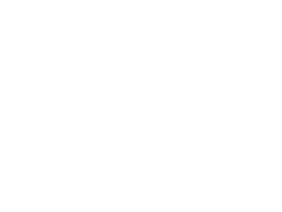

In [44]:




display(Image(filename='/Users/mraffyzeidan/Documents/Code/SS/ssdsYap/Feature-Selection.png'))

In [45]:
feature_importances = pd.DataFrame({
    'Feature': train.drop(columns=['electricity_shutdown', 'precipitation (mm)'], axis=1).columns,
    'Importance': model1.feature_importances_
})

feature_importances2 = pd.DataFrame({
    'Feature': train.drop(columns=['electricity_shutdown', 'precipitation (mm)'], axis=1).columns,
    'Importance': model2.feature_importances_
})

feature_importances['Importance'] = pd.to_numeric(feature_importances['Importance'], errors='coerce')
feature_importances2['Importance'] = pd.to_numeric(feature_importances2['Importance'], errors='coerce')

feature_importances = feature_importances.dropna(subset=['Importance'])
feature_importances2 = feature_importances2.dropna(subset=['Importance'])



##### **Feature for Regression**

In [46]:
top_features_1 = feature_importances.nlargest(10, 'Importance')['Feature']
top_features_2 = feature_importances2.nlargest(50, 'Importance')['Feature']


top_1_set = set(top_features_1)
top_2_set = set(top_features_2)


combined_features = top_2_set.union(top_1_set)
final_features = list(combined_features)



##### **Feature for Classification**

In [47]:
top_features_1_2 = feature_importances.nlargest(50, 'Importance')['Feature']
top_features_2_2 = feature_importances2.nlargest(10, 'Importance')['Feature']


top_1_set_2 = set(top_features_1_2)
top_2_set_2 = set(top_features_2_2)


combined_features2 = top_2_set_2.union(top_1_set_2)
final_features2 = list(combined_features2)


#### **3. Retrain model with Hyperparameter tuning with selected features using cross validating the model**

In [48]:
X1 = train[final_features2].values
y1 = train['electricity_shutdown']

X2 = train[final_features].values
y2 = train['precipitation (mm)']

scaler1 = StandardScaler()
scaler2 = StandardScaler()

X1 = scaler1.fit_transform(X1)
X2 = scaler2.fit_transform(X2)

In [49]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model2 = CatBoostRegressor(random_state=42, 
                            verbose=300,
                            iterations=1059, 
                            depth=5,
                            learning_rate=0.05523, 
                            l2_leaf_reg = 1.7120565544633608, 
                            subsample = 0.23231134344184745,
                            )

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(model2, X2, y2, cv=kf, scoring=mse_scorer)

print("MSE scores for each fold:", -cv_scores)
print("Mean MSE score:", -cv_scores.mean())
print("Mean RMSE score:", np.sqrt(-cv_scores.mean()))


0:	learn: 1.1660694	total: 4.14ms	remaining: 4.38s
300:	learn: 0.1340145	total: 1.01s	remaining: 2.54s
600:	learn: 0.0909785	total: 2.13s	remaining: 1.62s
900:	learn: 0.0740992	total: 3.22s	remaining: 565ms
1058:	learn: 0.0682823	total: 3.8s	remaining: 0us
0:	learn: 1.2323875	total: 3.11ms	remaining: 3.29s
300:	learn: 0.1412448	total: 970ms	remaining: 2.44s
600:	learn: 0.0958897	total: 1.91s	remaining: 1.45s
900:	learn: 0.0764277	total: 2.83s	remaining: 497ms
1058:	learn: 0.0702592	total: 3.33s	remaining: 0us
0:	learn: 1.1932767	total: 3.48ms	remaining: 3.68s
300:	learn: 0.1358678	total: 992ms	remaining: 2.5s
600:	learn: 0.0928244	total: 2.02s	remaining: 1.54s
900:	learn: 0.0755972	total: 2.95s	remaining: 517ms
1058:	learn: 0.0693131	total: 3.44s	remaining: 0us
0:	learn: 1.2071832	total: 2.77ms	remaining: 2.93s
300:	learn: 0.1357856	total: 954ms	remaining: 2.4s
600:	learn: 0.0909319	total: 1.95s	remaining: 1.48s
900:	learn: 0.0724314	total: 2.95s	remaining: 517ms
1058:	learn: 0.0663158

In [50]:

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('oversample', RandomOverSampler(random_state=42)), 
    ('model', CatBoostClassifier(random_state=42,
                                 verbose=1,
                                 iterations=950, 
                                 learning_rate=0.01
                                 ))
])

f1_scorer = make_scorer(f1_score)
cv_scores = cross_val_score(pipeline, X1, y1, cv=kf, scoring=f1_scorer)

print("F1 scores for each fold:", cv_scores)
print("Mean F1 score:", cv_scores.mean())


0:	learn: 0.6833762	total: 13.1ms	remaining: 12.4s
1:	learn: 0.6725742	total: 24.2ms	remaining: 11.5s
2:	learn: 0.6610331	total: 35ms	remaining: 11s
3:	learn: 0.6523634	total: 45.8ms	remaining: 10.8s
4:	learn: 0.6428691	total: 58.8ms	remaining: 11.1s
5:	learn: 0.6331765	total: 70.9ms	remaining: 11.2s
6:	learn: 0.6246396	total: 84.3ms	remaining: 11.4s
7:	learn: 0.6151216	total: 97.2ms	remaining: 11.4s
8:	learn: 0.6059977	total: 111ms	remaining: 11.6s
9:	learn: 0.5991017	total: 124ms	remaining: 11.7s
10:	learn: 0.5909069	total: 138ms	remaining: 11.8s
11:	learn: 0.5818135	total: 153ms	remaining: 12s
12:	learn: 0.5732043	total: 169ms	remaining: 12.2s
13:	learn: 0.5644893	total: 187ms	remaining: 12.5s
14:	learn: 0.5563942	total: 205ms	remaining: 12.8s
15:	learn: 0.5505896	total: 221ms	remaining: 12.9s
16:	learn: 0.5425809	total: 240ms	remaining: 13.2s
17:	learn: 0.5374263	total: 259ms	remaining: 13.4s
18:	learn: 0.5303182	total: 280ms	remaining: 13.7s
19:	learn: 0.5235302	total: 299ms	remai

In [51]:
X2_train , X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.17 ,random_state=42)

model2 = CatBoostRegressor(random_state=42, 
                            verbose=300,
                            iterations=1059, 
                            depth=5,
                            learning_rate=0.05523, 
                            l2_leaf_reg = 1.7120565544633608, 
                            subsample = 0.23231134344184745,
                            )
model2.fit(X2_train, y2_train)

y2_pred = model2.predict(X2_test)

print(mean_squared_error(y2_test, y2_pred))
print(np.sqrt(mean_squared_error(y2_test, y2_pred)))

0:	learn: 1.1822862	total: 3.17ms	remaining: 3.36s
300:	learn: 0.1368236	total: 1.1s	remaining: 2.78s
600:	learn: 0.0944988	total: 2.38s	remaining: 1.82s
900:	learn: 0.0760076	total: 3.63s	remaining: 636ms
1058:	learn: 0.0694987	total: 4.23s	remaining: 0us
0.04423352707085773
0.21031768130820036


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.17, random_state=42, stratify=y1)
X_train, y_train = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)


model1 =  CatBoostClassifier(random_state=42,
                            verbose=100, 
                            iterations=950, 
                            learning_rate=0.01)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)


print(f1_score(y_test, y_pred))

0:	learn: 0.6831238	total: 9.45ms	remaining: 8.97s
100:	learn: 0.2253939	total: 1.17s	remaining: 9.82s
200:	learn: 0.1066185	total: 2.54s	remaining: 9.48s
300:	learn: 0.0576065	total: 3.62s	remaining: 7.82s
400:	learn: 0.0345179	total: 4.72s	remaining: 6.46s
500:	learn: 0.0227645	total: 5.93s	remaining: 5.31s
600:	learn: 0.0164218	total: 7.06s	remaining: 4.1s
700:	learn: 0.0122082	total: 8.13s	remaining: 2.89s
800:	learn: 0.0095318	total: 9.2s	remaining: 1.71s
900:	learn: 0.0077201	total: 10.3s	remaining: 558ms
949:	learn: 0.0070377	total: 10.8s	remaining: 0us
0.0


#### **4. Retrain model with final feature**

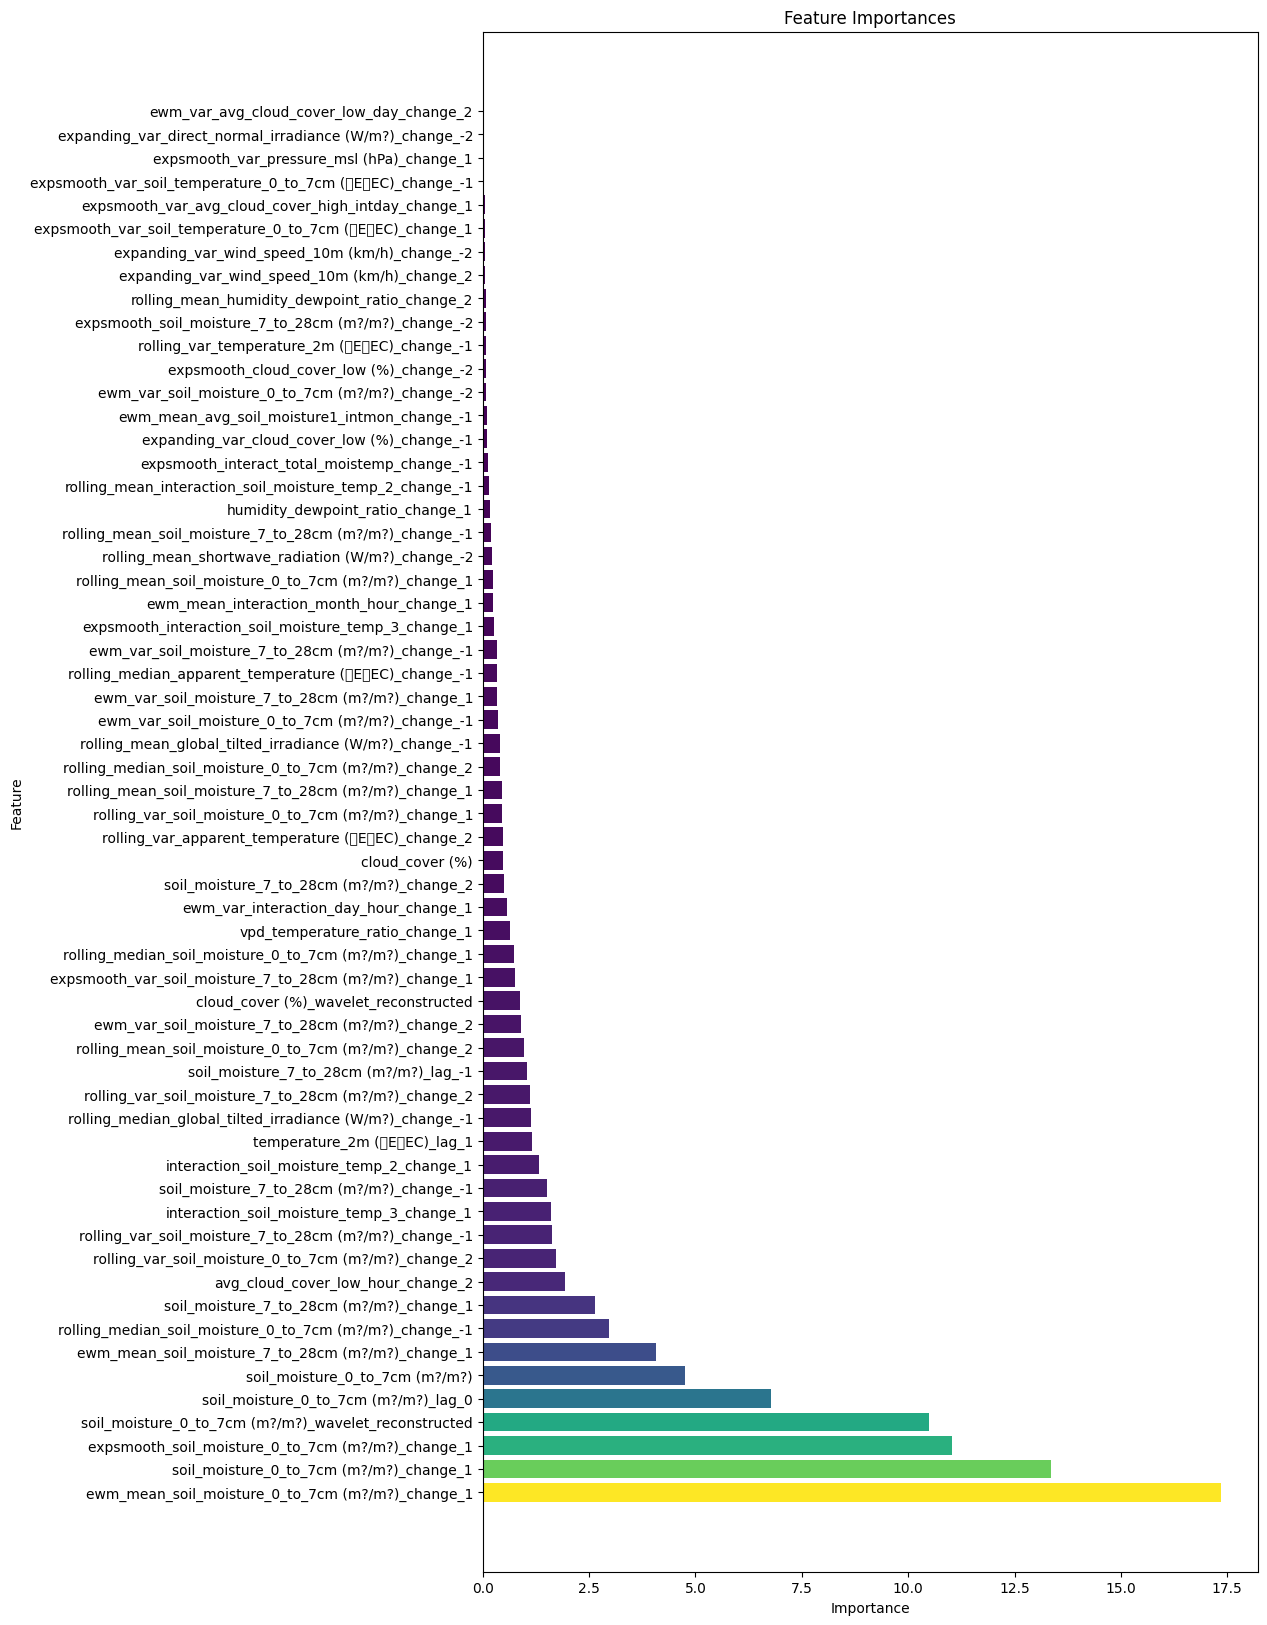

In [53]:
fig, ax = plt.subplots(figsize=(10, 20))
feature_importances = pd.DataFrame({'Feature': train[final_features].columns, 'Importance': model2.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances = feature_importances[feature_importances['Importance'] > 0]
ax.barh(feature_importances['Feature'], feature_importances['Importance'], color=plt.cm.viridis(feature_importances['Importance']/max(feature_importances['Importance'])))
ax.set_title('Feature Importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
plt.show()

In [54]:
X1 = train[final_features2].values
y1 = train['electricity_shutdown']

X2 = train[list(feature_importances[feature_importances['Importance'] > 0]['Feature'][:25].values)].values
y2 = train['precipitation (mm)']

scaler1 = StandardScaler()
scaler2 = StandardScaler()

X1 = scaler1.fit_transform(X1)
X2 = scaler2.fit_transform(X2)


In [55]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model2 = CatBoostRegressor(random_state=42, 
                            verbose=300,
                            iterations=1059, 
                            depth=5,
                            learning_rate=0.05523, 
                            l2_leaf_reg = 1.7120565544633608, 
                            subsample = 0.23231134344184745,
                            )

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(model2, X2, y2, cv=kf, scoring=mse_scorer)

print("MSE scores for each fold:", -cv_scores)
print("Mean MSE score:", -cv_scores.mean())
print("Mean RMSE score:", np.sqrt(-cv_scores.mean()))


0:	learn: 1.1659304	total: 1.95ms	remaining: 2.06s
300:	learn: 0.1386265	total: 680ms	remaining: 1.71s
600:	learn: 0.0958640	total: 1.38s	remaining: 1.05s
900:	learn: 0.0784740	total: 2.09s	remaining: 367ms
1058:	learn: 0.0726351	total: 2.43s	remaining: 0us
0:	learn: 1.2320646	total: 2.08ms	remaining: 2.21s
300:	learn: 0.1418292	total: 590ms	remaining: 1.49s
600:	learn: 0.0981856	total: 1.16s	remaining: 882ms
900:	learn: 0.0804054	total: 1.87s	remaining: 327ms
1058:	learn: 0.0739358	total: 2.32s	remaining: 0us
0:	learn: 1.1929336	total: 2.81ms	remaining: 2.98s
300:	learn: 0.1334714	total: 637ms	remaining: 1.6s
600:	learn: 0.0945240	total: 1.28s	remaining: 978ms
900:	learn: 0.0780642	total: 1.92s	remaining: 337ms
1058:	learn: 0.0722471	total: 2.22s	remaining: 0us
0:	learn: 1.2065535	total: 2.24ms	remaining: 2.37s
300:	learn: 0.1337928	total: 701ms	remaining: 1.76s
600:	learn: 0.0938585	total: 1.33s	remaining: 1.01s
900:	learn: 0.0768676	total: 2.04s	remaining: 359ms
1058:	learn: 0.07073

In [56]:
X2_train , X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.17 ,random_state=42)

model2 = CatBoostRegressor(random_state=42, 
                            verbose=300,
                            iterations=1059, 
                            depth=5,
                            learning_rate=0.05523, 
                            l2_leaf_reg = 1.7120565544633608, 
                            subsample = 0.23231134344184745,
                            )
model2.fit(X2_train, y2_train)

y2_pred = model2.predict(X2_test)

print(mean_squared_error(y2_test, y2_pred))
print(np.sqrt(mean_squared_error(y2_test, y2_pred)))

0:	learn: 1.1829289	total: 1.66ms	remaining: 1.76s
300:	learn: 0.1413481	total: 662ms	remaining: 1.67s
600:	learn: 0.0964762	total: 1.25s	remaining: 951ms
900:	learn: 0.0791387	total: 1.83s	remaining: 322ms
1058:	learn: 0.0735432	total: 2.17s	remaining: 0us
0.035447789478312564
0.18827583349520077


#### **5. Predicting using trained model**

In [57]:
testime = test['time']
testid = test['ID']

test.drop(columns=['ID', 'time'], inplace=True)


In [58]:
test1 = test[final_features2]
test1 = scaler1.transform(test1)

In [59]:
test2 = test[list(feature_importances[feature_importances['Importance'] > 0]['Feature'][:25].values)]
test2 = scaler2.transform(test2)

In [60]:
pred1 = model1.predict(test1)
pred2 = model2.predict(test2)

#### **6. Make a final submission**

In [61]:
submission = pd.DataFrame({'ID':  testid, 'precipitation (mm)': pred2 , 'electricity_shutdown': pred1,})


In [62]:
submission['electricity_shutdown'].value_counts()

electricity_shutdown
0    4365
1       3
Name: count, dtype: int64

In [63]:
submission['precipitation (mm)'].value_counts()

precipitation (mm)
 0.055982    1
-0.002748    1
 0.043653    1
 0.106584    1
 0.052958    1
            ..
 0.023395    1
 0.077088    1
 0.012098    1
 0.003641    1
-0.009664    1
Name: count, Length: 4368, dtype: int64

In [64]:
submission.to_csv('SubmissionFINAL.csv', index=False)

In [65]:
import pickle

with open('model1.pkl', 'wb') as f:
    pickle.dump(model1, f)

with open('model2.pkl', 'wb') as f:
    pickle.dump(model2, f)